# Plot Twist: What Data Reveals About Gender Equity in Cinema

In [315]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [316]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/Users/aqsa/Desktop/kaggle.json'


In [317]:
!kaggle datasets download -d mehmetisik/movie-metadata -p 

usage: kaggle datasets download [-h] [-f FILE_NAME] [-p PATH] [-w] [--unzip]
                                [-o] [-q]
                                [dataset]
kaggle datasets download: error: argument -p/--path: expected one argument


In [318]:
import zipfile

with zipfile.ZipFile('movie-metadata.zip', 'r') as zip_ref:
    zip_ref.extractall('movie-metadata')

In [319]:
import pandas as pd
df = pd.read_csv('/Users/aqsa/Desktop/movies_metadata.csv')
df.head(10)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
5  False                                                NaN  60000000   
6  False                                                NaN  58000000   
7  False                                                NaN         0   
8  False                                                NaN  35000000   
9  False  {'id': 645, 'name': 'James Bond Collection', '...  58000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   
5  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
6  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
7  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
8  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
9  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   

                                       homepage     id    imdb_id  \
0          http://toystory.disney.com/toy-story    862  tt0114709   
1                                           NaN   8844  tt0113497   
2                                           NaN  15602  tt0113228   
3                                           NaN  31357  tt0114885   
4                                           NaN  11862  tt0113041   
5                                           NaN    949  tt0113277   
6                                           NaN  11860  tt0114319   
7                                           NaN  45325  tt0112302   
8                                           NaN   9091  tt0114576   
9  http://www.mgm.com/view/movie/757/Goldeneye/    710  tt0113189   

  original_language               original_title  \
0                en                    Toy Story   
1                en                      Jumanji   
2                en             Grumpier Old Men   
3                en            Waiting to Exhale   
4                en  Father of the Bride Part II   
5                en                         Heat   
6                en                      Sabrina   
7                en                 Tom and Huck   
8                en                 Sudden Death   
9                en                    GoldenEye   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   
5  Obsessive master thief, Neil McCauley leads a ...  ...   1995-12-15   
6  An ugly duckling having undergone a remarkable...  ...   1995-12-15   
7  A mischievous young boy, Tom Sawyer, witnesses...  ...   1995-12-22   
8  International action superstar Jean Claude Van...  ...   1995-12-22   
9  James Bond must unmask the mysterious head of ...  ...   1995-11-16   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': '

Import Libraries

In [320]:
import pandas as pd
import numpy as np

### Read all of the movies on the Bechdel API (bechdeltest.com)

- I will retrieve the full movie list and the imdbid from the Bechdel API 

In [321]:
bech_df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies') #Date of Retrieval: 11/27/2024
#keep in mind that these are all of the APPROVED movies submitted to the database increasing the accuracy of the dataset

In [322]:
bech_df.head(5)

imdbid  rating  year                       title    id
0   3155794       0  1874            Passage de Venus  9602
1  14495706       0  1877           La Rosace Magique  9804
2   2221420       0  1878  Sallie Gardner at a Gallop  9603
3  12592084       0  1878           Le singe musicien  9806
4   7816420       0  1881     Athlete Swinging a Pick  9816

In [323]:
bech_df.tail(5)

imdbid  rating  year           title     id
10442  27410895       3  2024          Let go  11507
10443   9218128       1  2024    Gladiator II  11508
10444   1262426       3  2024  Wicked: Part 1  11509
10445  31807233       2  2024       Her story  11510
10446  24176060       1  2024           Queer  11513

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [325]:
bech_df.to_csv('/Users/aqsa/Desktop/Bechdel.csv')

In [326]:
print(bech_df.columns)

Index(['imdbid', 'rating', 'year', 'title', 'id'], dtype='object')


In [327]:
bech_df = pd.read_csv('/Users/aqsa/Desktop/Bechdel.csv')

In [328]:
bech_df.head(5)

Unnamed: 0      imdbid  rating  year                       title    id
0           0   3155794.0       0  1874            Passage de Venus  9602
1           1  14495706.0       0  1877           La Rosace Magique  9804
2           2   2221420.0       0  1878  Sallie Gardner at a Gallop  9603
3           3  12592084.0       0  1878           Le singe musicien  9806
4           4   7816420.0       0  1881     Athlete Swinging a Pick  9816

In [329]:
bech_df.shape

(10447, 6)

# Data Cleaning + Integrity

### Now that I have both datasets loaded, I am going to inspect them separately for missing/null values before I merge them. 

### BECHDEL DATA 

In [330]:
print(bech_df.isnull().sum())

Unnamed: 0    0
imdbid        2
rating        0
year          0
title         0
id            0
dtype: int64


In [331]:
bech_df[bech_df['imdbid'].isnull()]

Unnamed: 0  imdbid  rating  year                  title     id
5852         5852     NaN       1  2008                 Machan  11315
10403       10403     NaN       3  2024  A Little Family Drama  11379

Since there are only two values i went ahead and looked them up on imdb myself to replace the null values with actual values

In [332]:
bech_df.loc[bech_df['title'] == 'Machan', 'imdbid'] = 1172522
bech_df.loc[bech_df['title'] == 'A Little Family Drama', 'imdbid'] = 21337754
print(bech_df.isnull().sum())

Unnamed: 0    0
imdbid        0
rating        0
year          0
title         0
id            0
dtype: int64


## MOVIE DATA

In [333]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [334]:
df.shape

(45466, 24)

In [335]:
df.head(2)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   

                               homepage    id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story   862  tt0114709                en   
1                                   NaN  8844  tt0113497                en   

  original_title                                           overview  ...  \
0      Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1        Jumanji  When siblings Judy and Peter discover an encha...  ...   

  release_date      revenue runtime  \
0   1995-10-30  373554033.0    81.0   
1   1995-12-15  262797249.0   104.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   

                                     tagline      title  video vote_average  \
0                                        NaN  Toy Story  False          7.7   
1  Roll the dice and unleash the excitement!    Jumanji  False          6.9   

  vote_count  
0     5415.0  
1     2413.0  

[2 rows x 24 columns]

In [336]:
print(df.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


I am going to reduce the amount of features i have to work with by dropping columns that do not add any value to my analysis

In [337]:
df= df.drop(columns=['belongs_to_collection', 'homepage'])

In [338]:
df= df.drop(columns=['overview', 'poster_path'])

In [339]:
df= df.drop(columns= 'tagline')

In [340]:
print(df.isnull().sum())

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                  17
original_language        11
original_title            0
popularity                5
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
spoken_languages          6
status                   87
title                     6
video                     6
vote_average              6
vote_count                6
dtype: int64


### Summary of data cleaning still to be implemented:
-  IMDB_ID - since there are only 17/45,000 movies that do not have an id, I am going to drop these null valuessince the make up a small number from my sample and the imdb_id is a critical feature for my merge with the bechdel dataset
-  release_date - going to set the null values as "unknown", i am going to extract the year from this column later in my analysis
-  runtime - replace with the 'unknown' value
-  production_* - fill the 6 values with 'unknown'

In [341]:
print(type(df))  # This was outputting nonetype before


<class 'pandas.core.frame.DataFrame'>


In [342]:
df = df[df['imdb_id'].notnull()]
df['release_date'].fillna("Unknown", inplace=True)
df['runtime'].fillna("Unknown", inplace=True)
df['production_companies'].fillna("Unknown", inplace=True)
df['production_countries'].fillna("Unknown", inplace=True)

In [343]:
print(df.isnull().sum())

adult                    0
budget                   0
genres                   0
id                       0
imdb_id                  0
original_language       11
original_title           0
popularity               5
production_companies     0
production_countries     0
release_date             0
revenue                  6
runtime                  0
spoken_languages         6
status                  87
title                    6
video                    6
vote_average             6
vote_count               6
dtype: int64


So these values where spoken_language is null are showing quite a few empty/null/0 values in other columns like production_countries, production_companies, and release_date. I am going to remove those values from the dataset as I would like to examine them further.

In [344]:
df[df['spoken_languages'].isnull()]

adult  \
19729                                              False   
19730                                 - Written by Ørnås   
29502                                              False   
29503   Rune Balot goes to a casino connected to the ...   
35586                                              False   
35587   Avalanche Sharks tells the story of a bikini ...   

                                 budget  \
19729                                 0   
19730  /ff9qCepilowshEtG2GYWwzt2bs4.jpg   
29502                                 0   
29503  /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg   
35586                                 0   
35587  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg   

                                                  genres          id  \
19729  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...       82663   
19730  [{'name': 'Carousel Productions', 'id': 11176}...  1997-08-20   
29502  [{'id': 16, 'name': 'Animation'}, {'id': 878, ...      122662   
29503  [{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...  2012-09-29   
35586  [{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...      249260   
35587  [{'name': 'Odyssey Media', 'id': 17161}, {'nam...  2014-01-01   

         imdb_id original_language                            original_title  \
19729  tt0113002                en                              Midnight Man   
19730          0             104.0  [{'iso_639_1': 'en', 'name': 'English'}]   
29502  tt2423504                ja                          マルドゥック・スクランブル 排気   
29503          0              68.0      [{'iso_639_1': 'ja', 'name': '日本語'}]   
35586  tt2622826                en                          Avalanche Sharks   
35587          0              82.0  [{'iso_639_1': 'en', 'name': 'English'}]   

                  popularity production_companies production_countries  \
19729                    NaN              Unknown              Unknown   
19730                    NaN                False                  6.0   
29502                    NaN              Unknown              Unknown   
29503                    NaN                False                  7.0   
35586                    NaN              Unknown              Unknown   
35587  Beware Of Frost Bites                False                  4.3   

      release_date  revenue  runtime spoken_languages status title video  \
19729      Unknown      NaN  Unknown              NaN    NaN   NaN   NaN   
19730            1      NaN  Unknown              NaN    NaN   NaN   NaN   
29502      Unknown      NaN  Unknown              NaN    NaN   NaN   NaN   
29503           12      NaN  Unknown              NaN    NaN   NaN   NaN   
35586      Unknown      NaN  Unknown              NaN    NaN   NaN   NaN   
35587           22      NaN  Unknown              NaN    NaN   NaN   NaN   

       vote_average  vote_count  
19729           NaN         NaN  
19730           NaN         NaN  
29502           NaN         NaN  
29503           NaN         NaN  
35586           NaN         NaN  
35587           NaN         NaN

In [345]:
df = df.dropna(subset=['spoken_languages'])

In [346]:
print(df.isnull().sum())

adult                    0
budget                   0
genres                   0
id                       0
imdb_id                  0
original_language       11
original_title           0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                  81
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64


In [347]:
df['status'].nunique()
df['status'].value_counts()

status
Released           44999
Rumored              228
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

So after examining this feature I want to get rid of all of the types of 'status' the film could have since the bechdel dataset has purely released movies (you can only apply the test on a completed movie anyway!) so I will go ahead and delete all the values and only keep the rows that have 'status' = to 'released'

In [348]:
df = df[df['status'] == 'Released']

In [349]:
df['status'].nunique()
df['status'].value_counts()

status
Released    44999
Name: count, dtype: int64

In [350]:
df[df['original_language'].isnull()]

adult budget                                             genres  \
19574  False      0                [{'id': 99, 'name': 'Documentary'}]   
21602  False      0  [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...   
22832  False      0  [{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...   
32141  False      0                     [{'id': 35, 'name': 'Comedy'}]   
37407  False      0                  [{'id': 16, 'name': 'Animation'}]   
41047  False      0                [{'id': 99, 'name': 'Documentary'}]   
41872  False      0                [{'id': 99, 'name': 'Documentary'}]   
44057  False      0                      [{'id': 18, 'name': 'Drama'}]   
44410  False      0  [{'id': 16, 'name': 'Animation'}, {'id': 99, '...   
44576  False      0                                                 []   

           id    imdb_id original_language              original_title  \
19574  283101  tt0429086               NaN     Shadowing the Third Man   
21602  103902  tt0838231               NaN              Unfinished Sky   
22832  359195  tt0053558               NaN             13 Fighting Men   
32141  147050  tt0122580               NaN                   Lambchops   
37407  257095  tt0225145               NaN                      Bajaja   
41047  332742  tt4432912               NaN              Song of Lahore   
41872  144410  tt0154152               NaN  Annabelle Serpentine Dance   
44057  380438  tt0298411               NaN       Lettre d'une inconnue   
44410  381096  tt5333518               NaN                        Garn   
44576  381525  tt5376720               NaN                      WiNWiN   

      popularity                               production_companies  \
19574   0.017007  [{'name': 'StudioCanal', 'id': 694}, {'name': ...   
21602   0.359818  [{'name': 'New Holland Pictures', 'id': 10229}...   
22832   0.070647  [{'name': 'Associated Producers (API)', 'id': ...   
32141   0.073418  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
37407   0.036841  [{'name': 'Ceskoslovenský Státní Film', 'id': ...   
41047   0.373688                                                 []   
41872    1.58434  [{'name': 'Edison Manufacturing Company', 'id'...   
44057   0.001283                                                 []   
44410   0.067624                                                 []   
44576   0.030766                                                 []   

                                    production_countries release_date  \
19574  [{'iso_3166_1': 'AT', 'name': 'Austria'}, {'is...   2004-10-11   
21602        [{'iso_3166_1': 'AU', 'name': 'Australia'}]   2007-08-04   
22832  [{'iso_3166_1': 'US', 'name': 'United States o...   1960-03-31   
32141  [{'iso_3166_1': 'US', 'name': 'United States o...   1929-10-31   
37407   [{'iso_3166_1': 'CZ', 'name': 'Czech Republic'}]   1950-01-26   
41047                                                 []   2015-11-13   
41872  [{'iso_3166_1': 'US', 'name': 'United States o...   1895-04-01   
44057           [{'iso_3166_1': 'FR', 'name': 'France'}]   2001-01-01   
44410                                                 []   2016-03-12   
44576          [{'iso_3166_1': 'AT', 'name': 'Austria'}]   2016-01-27   

       revenue runtime                                   spoken_languages  \
19574      0.0    95.0  [{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...   
21602      0.0    94.0           [{'iso_639_1': 'en', 'name': 'English'}]   
22832      0.0    69.0           [{'iso_639_1': 'en', 'name': 'English'}]   
32141      0.0     8.0           [{'iso_639_1': 'en', 'name': 'English'}]   
37407      0.0    87.0             [{'iso_639_1': 'cs', 'name': 'Český'}]   
41047      0.0    82.0  [{'iso_639_1': 'ur', 'name': 'اردو'}, {'iso_63...   
41872      0.0     1.0       [{'iso_639_1': 'xx', 'name': 'No Language'}]   
44057      0.0     0.0          [{'iso_639_1': 'fr', 'name': 'Français'}]   
44410      0.0    76.0  [{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso...   
44576      0.0    84.

The null values for original_language seem to have quite a few instances of null/none values in other columns like revenue and vote_average which are both two features i will examine in my work so I am going to delete these ten null values.

In [351]:
df = df.dropna(subset='original_language')

In [352]:
df.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

## I am going to prepare for the merge and need to examine the imdb_id for both datasets to make sure things are consistent and I do not run into any issues

In [353]:
bech_df['imdbid'].dtypes
bech_df["imdbid"]

0         3155794.0
1        14495706.0
2         2221420.0
3        12592084.0
4         7816420.0
            ...    
10442    27410895.0
10443     9218128.0
10444     1262426.0
10445    31807233.0
10446    24176060.0
Name: imdbid, Length: 10447, dtype: float64

In [354]:
df['imdb_id'].dtypes
df["imdb_id"]

0        tt0114709
1        tt0113497
2        tt0113228
3        tt0114885
4        tt0113041
           ...    
45461    tt6209470
45462    tt2028550
45463    tt0303758
45464    tt0008536
45465    tt6980792
Name: imdb_id, Length: 44989, dtype: object

As expected, one of the ids is an object and the other is a float. I am going to create consistency by getting rid of the 'tt' prefix and then going in and changing the datatype before the merge. 

In [355]:
df['imdb_id'] = df['imdb_id'].str.lstrip('t0')

In [356]:
df["imdb_id"]

0         114709
1         113497
2         113228
3         114885
4         113041
          ...   
45461    6209470
45462    2028550
45463     303758
45464       8536
45465    6980792
Name: imdb_id, Length: 44989, dtype: object

In [357]:
# this makes sure that 'imdbid' and 'imdb_id' are strings for consistency
df['imdb_id'] = df['imdb_id'].astype(str)
bech_df['imdbid'] = bech_df['imdbid'].astype(str)

In [358]:
print(bech_df['imdbid'].dtypes)
print(df['imdb_id'].dtypes)

object
object


Lastly, i will rename the columns to the same name

In [359]:
bech_df.rename(columns={"imdbid": "imdb_id"}, inplace=True)

In [360]:
bech_df['imdb_id'] = bech_df['imdb_id'].str.replace(r'\.0$', '', regex=True)

In [361]:
print(df.shape)
print(bech_df.shape)

(44989, 19)
(10447, 6)


In [362]:
bech_df.head(3)


Unnamed: 0   imdb_id  rating  year                       title    id
0           0   3155794       0  1874            Passage de Venus  9602
1           1  14495706       0  1877           La Rosace Magique  9804
2           2   2221420       0  1878  Sallie Gardner at a Gallop  9603

### Movie Dataset:
- original data: (45466, 24)
- cleaned data: (44989, 19)

### Bechdel Dataset:
- original dataset had the same amount of values with two null imdb ids that I manually filled in!

I was able to keep majority of the dataset which is great as I move forward with more analysis.


Now, that I have things cleaned up, I am going to merge the two csv files together!

# Merging of Datasets - inner join

In [363]:
df_merged = df.merge(bech_df, how='inner', on='imdb_id')

In [364]:
df_merged.head(20)

adult    budget                                             genres   id_x  \
0   False  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862   
1   False  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844   
2   False         0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  15602   
3   False  16000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  31357   
4   False  60000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...    949   
5   False  58000000  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...  11860   
6   False  58000000  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...    710   
7   False  62000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   9087   
8   False         0  [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...  12110   
9   False         0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...  21032   
10  False  98000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   1408   
11  False  52000000  [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...    524   
12  False  16500000  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   4584   
13  False   4000000  [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...      5   
14  False  30000000  [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...   9273   
15  False         0  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   1710   
16  False  50000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   9691   
17  False   3600000  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...    451   
18  False         0                      [{'id': 18, 'name': 'Drama'}]  16420   
19  False  12000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   9263   

   imdb_id original_language                  original_title popularity  \
0   114709                en                       Toy Story  21.946943   
1   113497                en                         Jumanji  17.015539   
2   113228                en                Grumpier Old Men    11.7129   
3   114885                en               Waiting to Exhale   3.859495   
4   113277                en                            Heat  17.924927   
5   114319                en                         Sabrina   6.677277   
6   113189                en                       GoldenEye  14.686036   
7   112346                en          The American President   6.318445   
8   112896                en     Dracula: Dead and Loving It   5.430331   
9   112453                en                           Balto  12.140733   
10  112760                en                Cutthroat Island   7.284477   
11  112641                en                          Casino  10.137389   
12  114388                en           Sense and Sensibility  10.673167   
13  113101                en                      Four Rooms   9.026586   
14  112281                en  Ace Ventura: When Nature Calls   8.205448   
15  112722                en                         Copycat  10.701801   
16  112401                en                       Assassins  11.065939   
17  113627                en               Leaving Las Vegas  10.332025   
18  114057                en                         Othello   1.845899   
19  114011                en                    Now and Then   8.681325   

                                 production_companies  \
0      [{'name': 'Pixar Animation Studios', 'id': 3}]   
1   [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2   [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3   [{'name': 'Twentieth Century Fox Film Corporat...   
4   [{'name': 'Regency Enterprises', 'id': 508}, {...   
5   [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
6   [{'name': 'United Artists', 'id': 60}, {'name'...   
7   [{'name': 'Columbia Pictures', 'id': 5}, {'nam...   
8   [{'name': 'Columbia Pictures', 'id': 5}, {'nam...   
9   [{'name': 'Universal Pictures', 'id': 33}, {'n...   
10  [{'name': 'Le Studio Canal+', 'id': 183}, {'na...   
11  [{'name': 'Universal Pictures', 'id': 

In [365]:
df_merged.shape

(7965, 24)

In [366]:
df_merged.drop(columns='release_date', inplace=True)

In [367]:
df_merged.drop(columns='spoken_languages', inplace=True)

In [368]:
import ast


def extract_names(column):
    return column.apply(lambda x: ', '.join([item['name'] for item in ast.literal_eval(x)]))


df_merged['genres'] = extract_names(df_merged['genres'])
df_merged['production_countries'] = extract_names(df_merged['production_countries'])



In [369]:
import ast

def extract_names(column):
    return column.apply(lambda x: ', '.join([item['name'] for item in ast.literal_eval(x)]))

df_merged['production_companies'] = extract_names(df_merged['production_companies'])

Created a list of names instead of string so that I can use then in my analysis later

In [370]:
def split_string(column):
    """Split strings into lists by comma and clean whitespace."""
    return column.apply(lambda x: x.split(', ') if pd.notna(x) else [])

df_merged['genres'] = split_string(df_merged['genres'])
df_merged['production_countries'] = split_string(df_merged['production_countries'])
df_merged['production_companies'] = extract_names(df_merged['production_companies'])

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
df_merged.drop(columns=['title_x', 'video','Unnamed: 0', 'id_y'], inplace=True)

In [371]:
df_merged.head(2)

adult    budget                        genres  id_x imdb_id  \
0  False  30000000   [Animation, Comedy, Family]   862  114709   
1  False  65000000  [Adventure, Fantasy, Family]  8844  113497   

  original_language original_title popularity  \
0                en      Toy Story  21.946943   
1                en        Jumanji  17.015539   

                                production_companies  \
0                            Pixar Animation Studios   
1  TriStar Pictures, Teitler Film, Interscope Com...   

         production_countries  ...    status    title_x  video vote_average  \
0  [United States of America]  ...  Released  Toy Story  False          7.7   
1  [United States of America]  ...  Released    Jumanji  False          6.9   

  vote_count  Unnamed: 0  rating  year    title_y  id_y  
0     5415.0        3171       1  1995  Toy Story    87  
1     2413.0        3234       3  1995    Jumanji  3801  

[2 rows x 22 columns]

In [372]:

unique_countries = df_merged['original_language'].explode().unique()


print(unique_countries)

['en' 'fr' 'nl' 'cn' 'zh' 'es' 'ja' 'sr' 'bn' 'de' 'it' 'ru' 'sv' 'fa'
 'pt' 'da' 'xx' 'hi' 'ko' 'el' 'he' 'pl' 'th' 'fi' 'hu' 'no' 'tr' 'la'
 'cs' 'ro' 'mn' 'ar' 'bs' 'wo' 'nb' 'ta' 'id' 'sq' 'is' 'te' 'et' 'kn'
 'lt' 'mr' 'bg' 'ab' 'hr' 'uk']


In [373]:
language_mapping = {
    'en': 'English',
    'fr': 'French',
    'nl': 'Dutch',
    'cn': 'Chinese',
    'zh': 'Chinese',
    'es': 'Spanish',
    'ja': 'Japanese',
    'sr': 'Serbian',
    'bn': 'Bengali',
    'de': 'German',
    'it': 'Italian',
    'ru': 'Russian',
    'sv': 'Swedish',
    'fa': 'Farsi',
    'pt': 'Portuguese',
    'da': 'Danish',
    'xx': 'Unknown',
    'hi': 'Hindi',
    'ko': 'Korean',
    'el': 'Greek',
    'he': 'Hebrew',
    'pl': 'Polish',
    'th': 'Thai',
    'fi': 'Finnish',
    'hu': 'Hungarian',
    'no': 'Norwegian',
    'tr': 'Turkish',
    'la': 'Latin',
    'cs': 'Czech',
    'ro': 'Romanian',
    'mn': 'Mongolian',
    'ar': 'Arabic',
    'bs': 'Bosnian',
    'wo': 'Wolof',
    'nb': 'Norwegian',
    'ta': 'Tamil',
    'id': 'Indonesian',
    'sq': 'Albanian',
    'is': 'Icelandic',
    'te': 'Telugu',
    'et': 'Estonian',
    'kn': 'Kannada',
    'lt': 'Lithuanian',
    'mr': 'Marathi',
    'bg': 'Bulgarian',
    'ab': 'Abkhazian',
    'hr': 'Croatian',
    'uk': 'Ukrainian'
}



df_merged['original_language'] = df_merged['original_language'].apply(lambda x: language_mapping.get(x, 'Unknown/Custom'))


In [374]:
df_merged.shape

(7965, 22)

In [375]:
df_merged.head(5)

adult    budget                            genres   id_x imdb_id  \
0  False  30000000       [Animation, Comedy, Family]    862  114709   
1  False  65000000      [Adventure, Fantasy, Family]   8844  113497   
2  False         0                 [Romance, Comedy]  15602  113228   
3  False  16000000          [Comedy, Drama, Romance]  31357  114885   
4  False  60000000  [Action, Crime, Drama, Thriller]    949  113277   

  original_language     original_title popularity  \
0           English          Toy Story  21.946943   
1           English            Jumanji  17.015539   
2           English   Grumpier Old Men    11.7129   
3           English  Waiting to Exhale   3.859495   
4           English               Heat  17.924927   

                                production_companies  \
0                            Pixar Animation Studios   
1  TriStar Pictures, Teitler Film, Interscope Com...   
2                       Warner Bros., Lancaster Gate   
3             Twentieth Century Fox Film Corporation   
4    Regency Enterprises, Forward Pass, Warner Bros.   

         production_countries  ...    status            title_x  video  \
0  [United States of America]  ...  Released          Toy Story  False   
1  [United States of America]  ...  Released            Jumanji  False   
2  [United States of America]  ...  Released   Grumpier Old Men  False   
3  [United States of America]  ...  Released  Waiting to Exhale  False   
4  [United States of America]  ...  Released               Heat  False   

  vote_average vote_count  Unnamed: 0  rating  year            title_y   id_y  
0          7.7     5415.0        3171       1  1995          Toy Story     87  
1          6.9     2413.0        3234       3  1995            Jumanji   3801  
2          6.5       92.0        3291       3  1995   Grumpier Old Men  10697  
3          6.1       34.0        3280       2  1995  Waiting To Exhale   9104  
4          7.7     1886.0        3201       2  1995               Heat   1037  

[5 rows x 22 columns]

In [376]:
df_merged.to_csv('/Users/aqsa/Desktop/finalmerged.csv')

In [377]:
df_merged.isnull().sum()

adult                   0
budget                  0
genres                  0
id_x                    0
imdb_id                 0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
status                  0
title_x                 0
video                   0
vote_average            0
vote_count              0
Unnamed: 0              0
rating                  0
year                    0
title_y                 0
id_y                    0
dtype: int64

In [378]:
df_merged['pass_bechdel'] = df_merged['rating'].apply(lambda x: 1 if x >= 3 else 0)
df_merged

adult    budget                            genres   id_x imdb_id  \
0     False  30000000       [Animation, Comedy, Family]    862  114709   
1     False  65000000      [Adventure, Fantasy, Family]   8844  113497   
2     False         0                 [Romance, Comedy]  15602  113228   
3     False  16000000          [Comedy, Drama, Romance]  31357  114885   
4     False  60000000  [Action, Crime, Drama, Thriller]    949  113277   
...     ...       ...                               ...    ...     ...   
7960  False         0                 [Fantasy, Comedy]  49277  135122   
7961  False         0                 [Fantasy, Comedy]  49271  127948   
7962  False         0                                []  44324  135631   
7963  False         0       [Fantasy, Action, Thriller]  49280  135453   
7964  False         0          [Drama, Action, Romance]  30840  102797   

     original_language            original_title popularity  \
0              English                 Toy Story  21.946943   
1              English                   Jumanji  17.015539   
2              English          Grumpier Old Men    11.7129   
3              English         Waiting to Exhale   3.859495   
4              English                      Heat  17.924927   
...                ...                       ...        ...   
7960           English  Les affiches en goguette   0.148131   
7961           English   Le locataire diabolique   0.725084   
7962            French      Le Roi du maquillage   0.213973   
7963            French         L'Homme orchestre   1.109068   
7964           English                Robin Hood   5.683753   

                                   production_companies  \
0                               Pixar Animation Studios   
1     TriStar Pictures, Teitler Film, Interscope Com...   
2                          Warner Bros., Lancaster Gate   
3                Twentieth Century Fox Film Corporation   
4       Regency Enterprises, Forward Pass, Warner Bros.   
...                                                 ...   
7960                          Star-Film, Georges Méliès   
7961                                  Star Film Company   
7962                                  Star Film Company   
7963                                  Star Film Company   
7964  Westdeutscher Rundfunk (WDR), Working Title Fi...   

                                   production_countries  ...  \
0                            [United States of America]  ...   
1                            [United States of America]  ...   
2                            [United States of America]  ...   
3                            [United States of America]  ...   
4                            [United States of America]  ...   
...                                                 ...  ...   
7960                                           [France]  ...   
7961                                           [France]  ...   
7962                                           [France]  ...   
7963                                           [France]  ...   
7964  [Canada, Germany, United Kingdom, United State...  ...   

                      title_x  video vote_average vote_count Unnamed: 0  \
0                   Toy Story  False          7.7     5415.0       3171   
1                     Jumanji  False          6.9     2413.0       3234   
2            Grumpier Old Men  False          6.5       92.0       3291   
3           Waiting to Exhale  False          6.1       34.0       3280   
4                        Heat  False          7.7     1886.0       3201   
...                       ...    ...          ...        ...        ...   
7960    The Hilarious Posters  False          4.5        2.0        118   
7961      The Devilish Tenant  False          6.7       12.0        126   
7962  The Untameable Whiskers  False          6.0        6.0        111   
7963         The One-Man Band  False          6.5       22.0         92   
7964               Robin Hood  False          5.7       2

# Data Visualizations

### 1.1 Female Representation Over The Decades

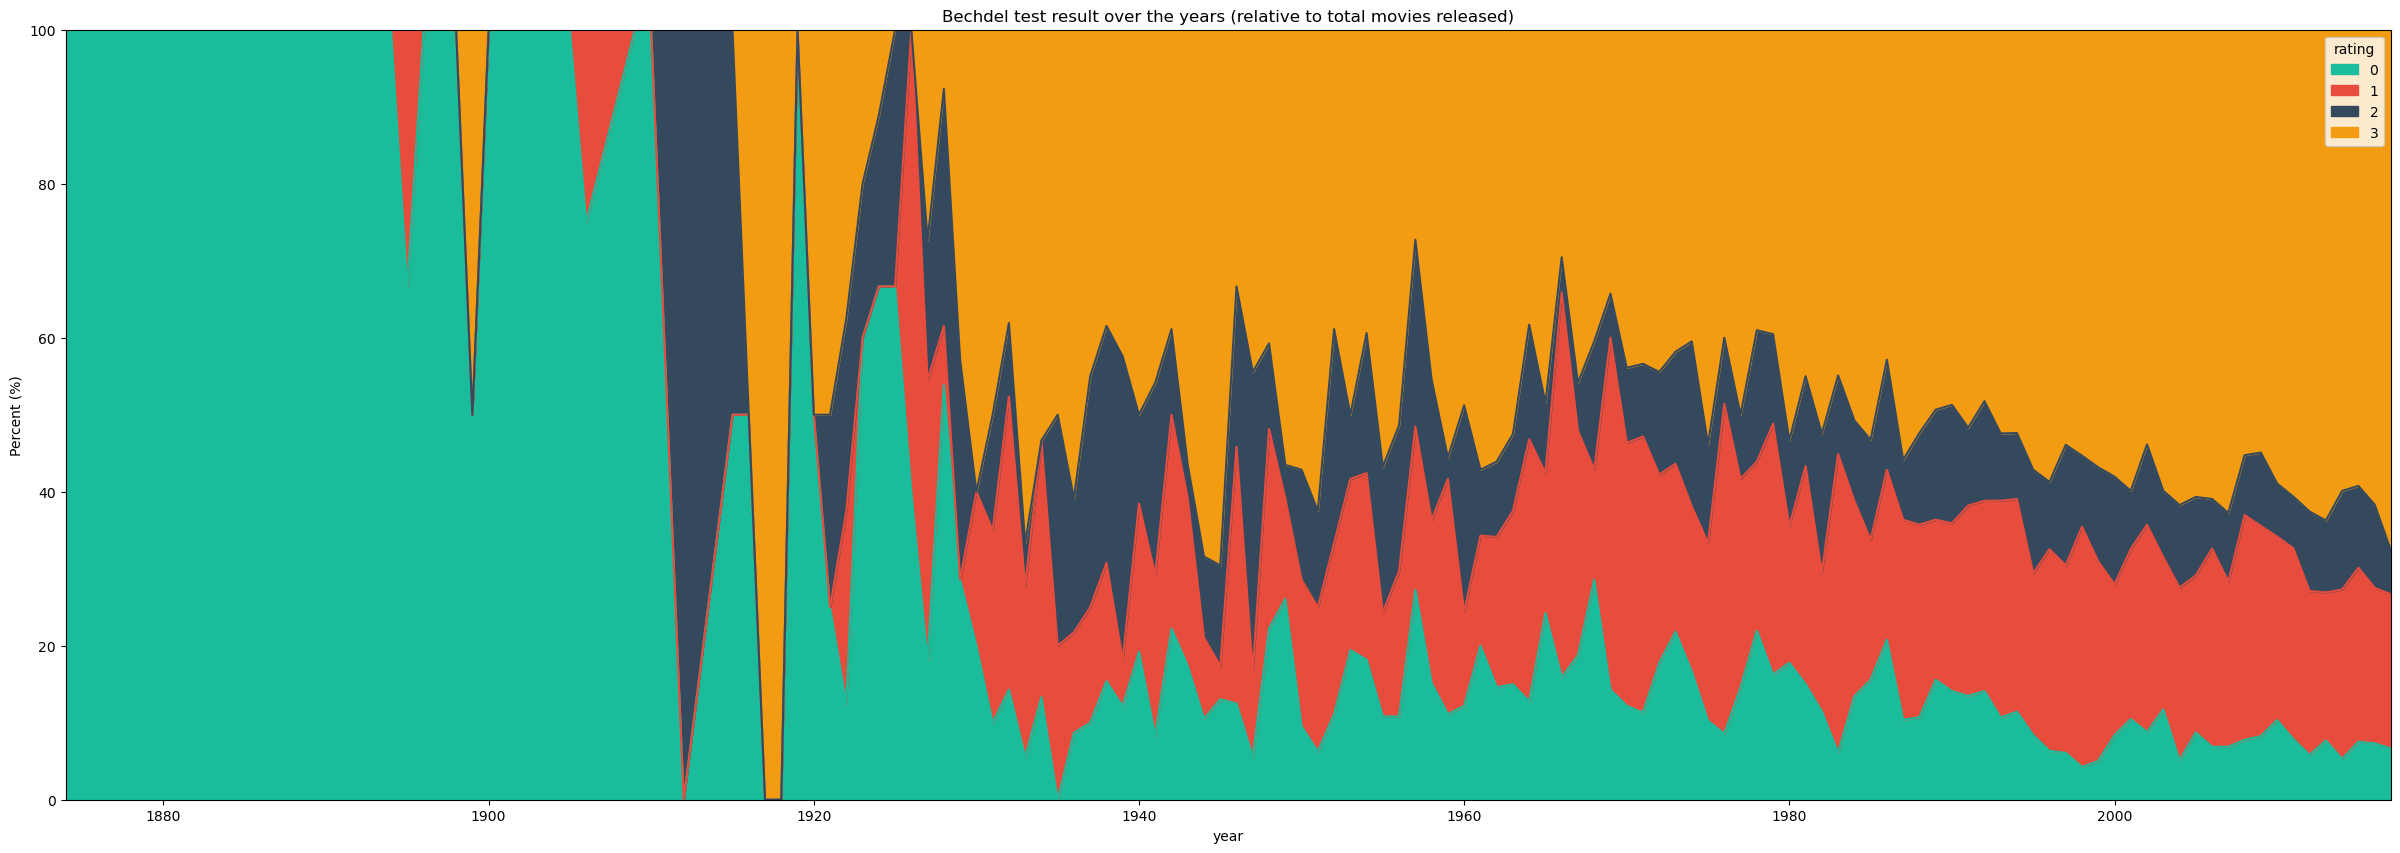

In [379]:
import matplotlib.pyplot as plt

df_merged["rating"] = df_merged["rating"].astype("category")


bech_over_years = df_merged.groupby(["year", "rating"])["rating"].count()
bech_over_years = bech_over_years.unstack()

colors = [
   '#1abc9c', 
    '#e74c3c',  
    '#34495e',  
    '#f39c12'
]

stacked_data = bech_over_years.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind ="area", stacked=True, figsize=(30,10) , color=colors)

plt.ylabel('Percent (%)')
plt.autoscale(enable=True, axis='both', tight=True)
plt.title("Bechdel test result over the years (relative to total movies released)")
plt.show()


### 1.1 Analysis

This graphic tells me that over the years, out of all movies released in the year, more movies pass the bechdel test.

### 1.2 Bechdel Pass Rate over Time

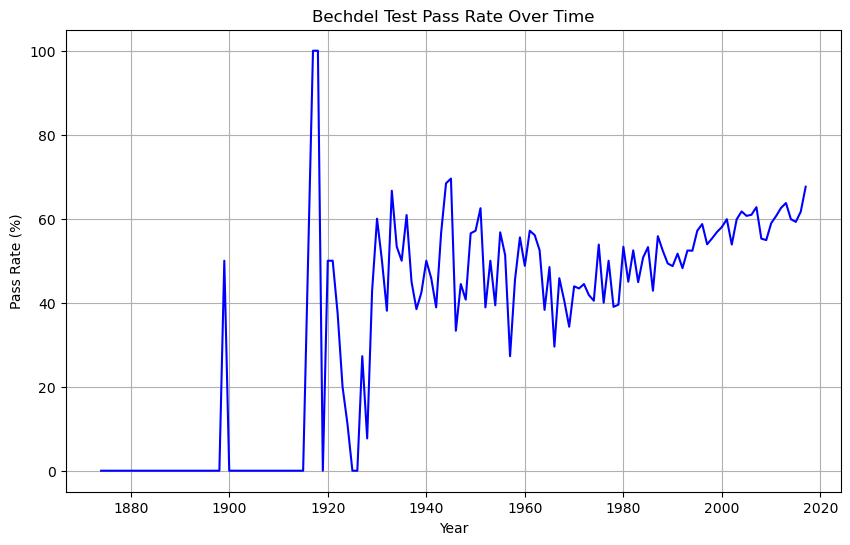

In [380]:
df_merged['year'] = pd.to_datetime(df_merged['year'], format='%Y')
bechdel_rate = df_merged.groupby(df_merged['year'].dt.year)['pass_bechdel'].mean() * 100
plt.figure(figsize=(10, 6))
bechdel_rate.plot(kind='line', color='b')
plt.title("Bechdel Test Pass Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Pass Rate (%)")
plt.grid(True)
plt.show()


### 1.2 Analysis

This shows a similar relationship to the graph above but this graph is different as it only considers if the movie passed (0) or failed (1) it does not consider the other parts of the bechdel test.

### 1.3 IMDb ratings compared for movies that pass vs. fail the Bechdel Test.

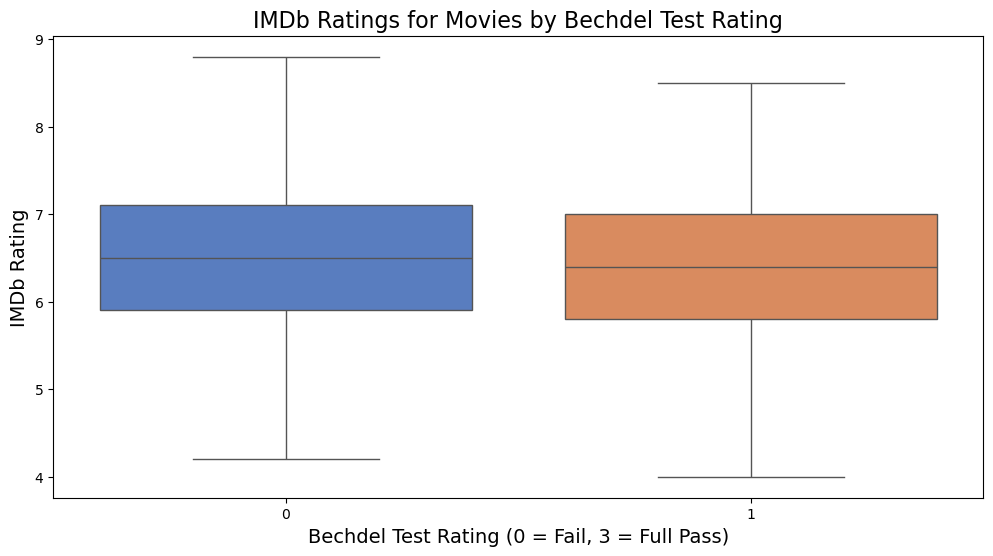

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


sns.boxplot(data=df_merged, x="pass_bechdel", y="vote_average", palette="muted", showfliers=False)
# Customize the plot
plt.title("IMDb Ratings for Movies by Bechdel Test Rating", fontsize=16)
plt.xlabel("Bechdel Test Rating (0 = Fail, 3 = Full Pass)", fontsize=14)
plt.ylabel("IMDb Rating", fontsize=14)


plt.show()


### 1.3 Analysis

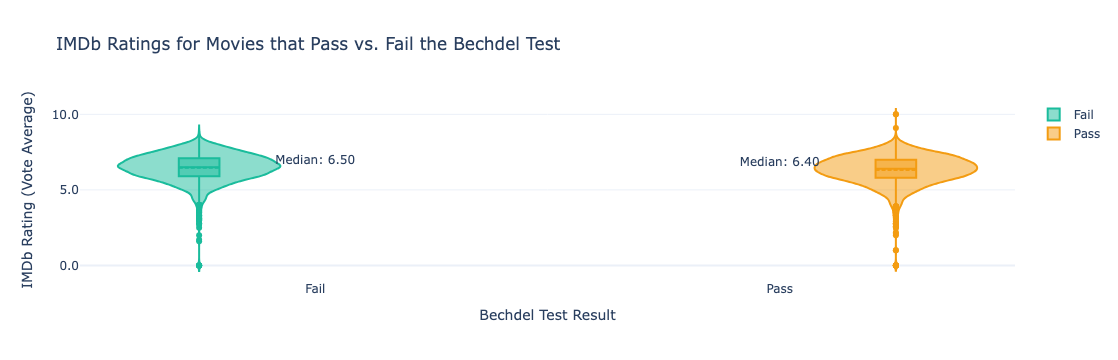

In [382]:
import plotly.graph_objects as go


fig = go.Figure()


fail_data = df_merged['vote_average'][df_merged['pass_bechdel'] == 0]
pass_data = df_merged['vote_average'][df_merged['pass_bechdel'] == 1]


fig.add_trace(go.Violin(
    x=['Fail'] * len(fail_data),  
    y=fail_data,                 
    name='Fail',
    box_visible=True,
    meanline_visible=True,
    line_color='#1abc9c'  
))


fig.add_trace(go.Violin(
    x=['Pass'] * len(pass_data),  
    y=pass_data,                
    name='Pass',
    box_visible=True,
    meanline_visible=True,
    line_color='#f39c12'  
))


fail_median = fail_data.median()
pass_median = pass_data.median()

fig.add_trace(go.Scatter(
    x=['Fail'], y=[fail_median],
    mode='text',
    text=[f"Median: {fail_median:.2f}"],
    textposition="top center",
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=['Pass'], y=[pass_median],
    mode='text',
    text=[f"Median: {pass_median:.2f}"],
    textposition="top center",
    showlegend=False
))

# Customize layout
fig.update_layout(
    title="IMDb Ratings for Movies that Pass vs. Fail the Bechdel Test",
    xaxis_title="Bechdel Test Result",
    yaxis_title="IMDb Rating (Vote Average)",
    violingap= 0,  
    violinmode="group",  
    template="plotly_white",  
    yaxis=dict(tickformat=".1f")
)


fig.show()




### 1.2 + 1.3 Analysis

Both of these graphs show the distribution of bechdel pass/fail results given the imdb rating of that specific movie. Some insights I gather:
- the 

### 1.4 Correlation Between Bechdel Test Pass and IMDb Rating

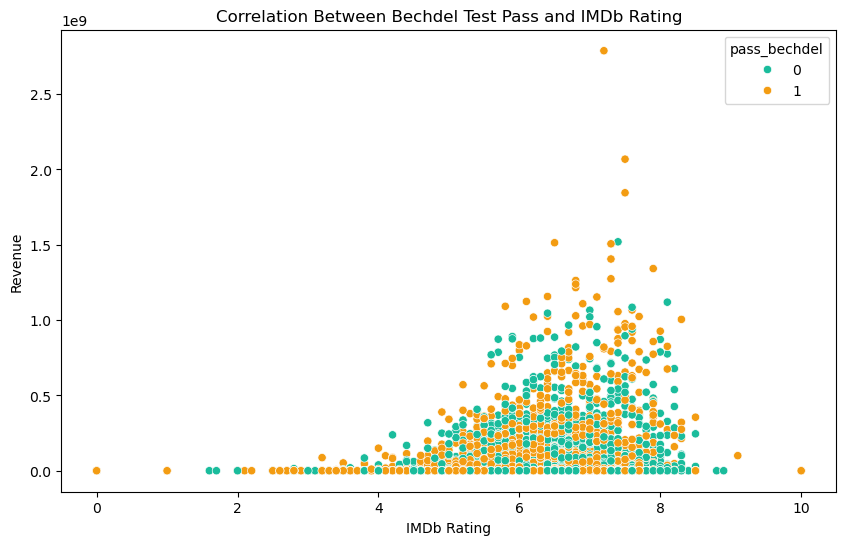

In [383]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='revenue', hue='pass_bechdel', data=df_merged, palette= [ '#1abc9c',  
    '#f39c12'])
plt.title("Correlation Between Bechdel Test Pass and IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Revenue")
plt.show()

### 1.5 Is there a genre-based difference in passing rates for the Bechdel Test?

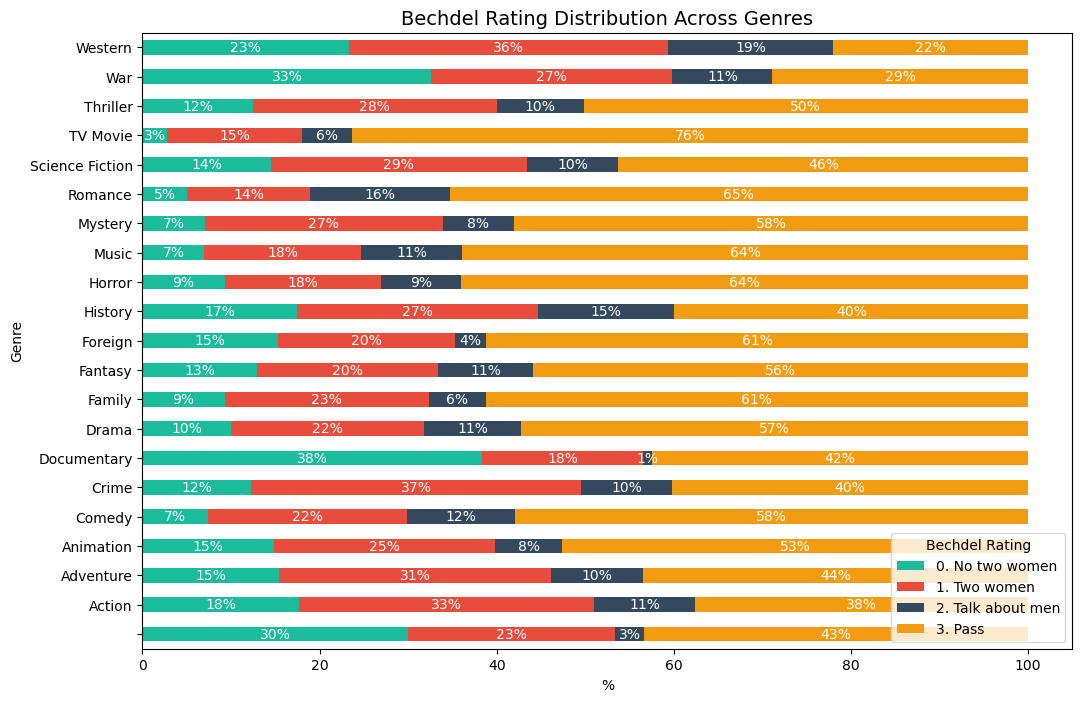

In [384]:
import pandas as pd
import matplotlib.pyplot as plt


flattened = df_merged.explode("genres")


grouped = flattened.groupby(["genres", "rating"]).size().reset_index(name="count")


pivot = grouped.pivot(index="genres", columns="rating", values="count").fillna(0)
pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0) * 100  


plt.figure(figsize=(12, 8))

colors = [ '#1abc9c', 
    '#e74c3c',  
    '#34495e',  
    '#f39c12']  
pivot_percentage.plot(kind="barh", stacked=True, color=colors, edgecolor="none", ax=plt.gca())


for i, genre in enumerate(pivot_percentage.index):
    cumulative = 0 
    for rating, value in pivot_percentage.loc[genre].items():
        if value > 0:  
            plt.text(
                cumulative + value / 2,  
                i,  
                f"{value:.0f}%", 
                ha="center", va="center", fontsize=10, color="white"  
            )
            cumulative += value  


plt.xlabel("%")
plt.ylabel("Genre")
plt.title("Bechdel Rating Distribution Across Genres", fontsize=14)
plt.legend(title="Bechdel Rating", labels=["0. No two women", "1. Two women", "2. Talk about men", "3. Pass"], loc="lower right", fontsize=10)
plt.subplots_adjust()


plt.show()


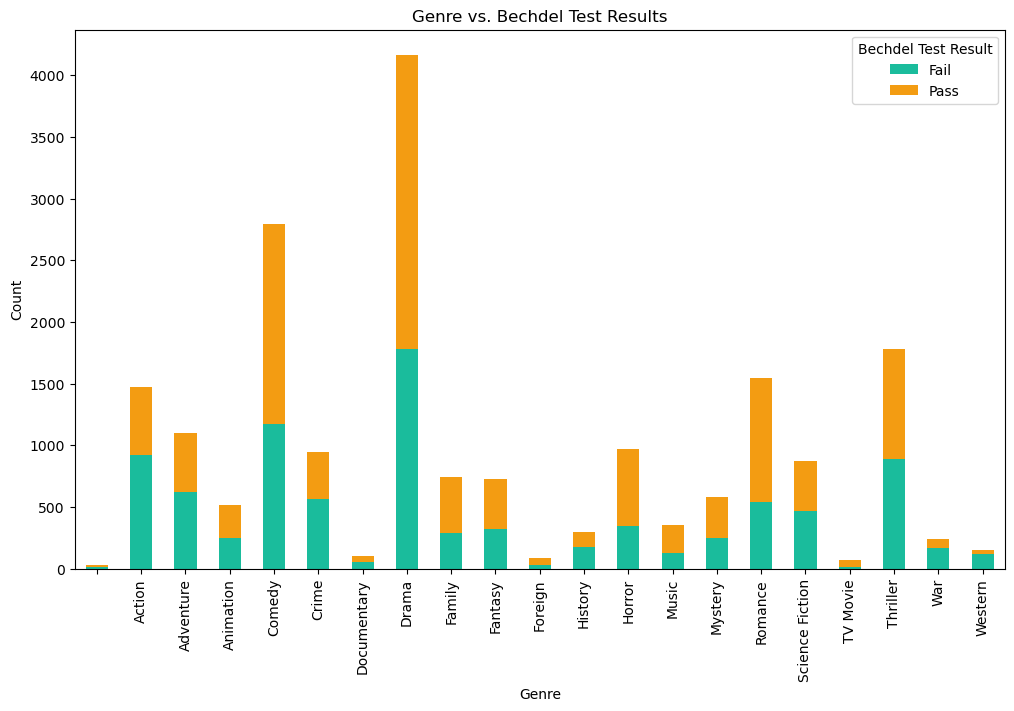

In [385]:
genre_bechdel = df_merged.explode('genres').groupby(['genres', 'pass_bechdel']).size().unstack().fillna(0)
genre_bechdel.plot(kind='bar', stacked=True, figsize=(12, 7), color =['#1abc9c',   
    '#f39c12'])
plt.title("Genre vs. Bechdel Test Results")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Bechdel Test Result", labels=["Fail", "Pass"])
plt.show()

### 1.6  Revenue Distribution by Bechdel Test Result

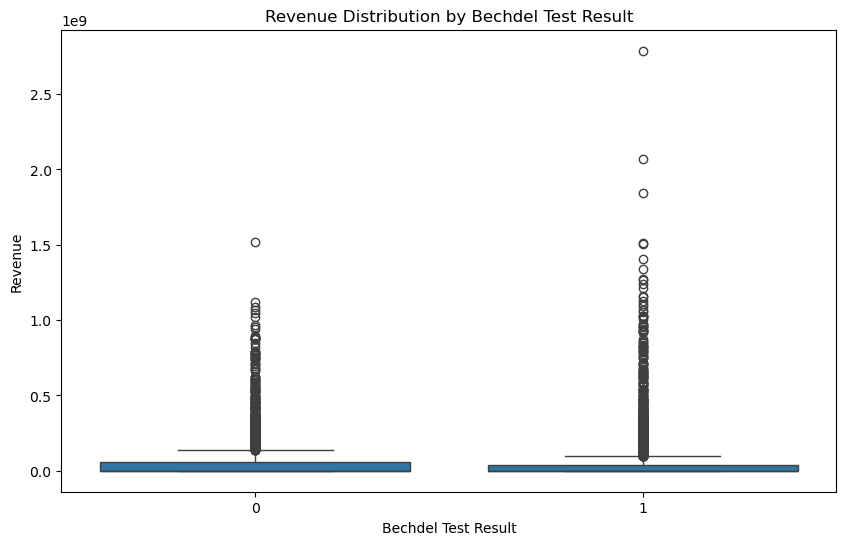

In [386]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pass_bechdel', y='revenue', data=df_merged)
plt.title("Revenue Distribution by Bechdel Test Result")
plt.xlabel("Bechdel Test Result")
plt.ylabel("Revenue")
plt.show()

### 1.7 Budget vs. Bechdel Test Results

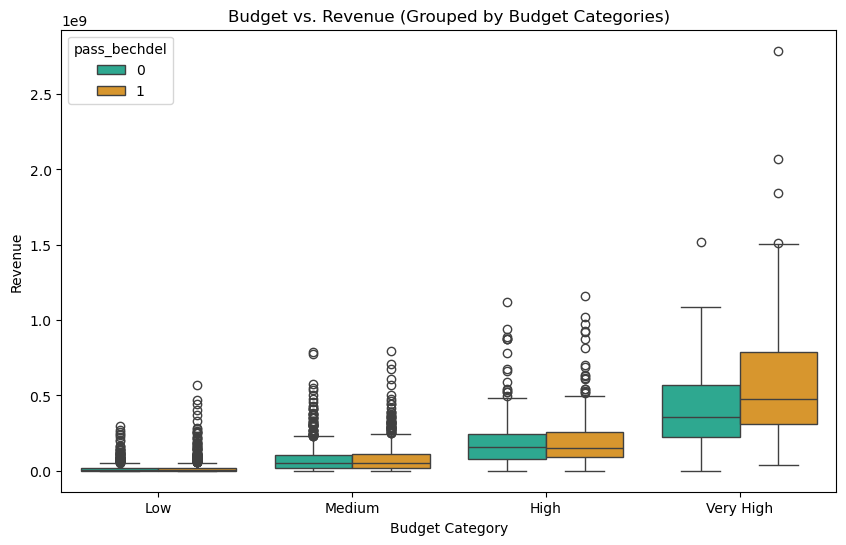

In [387]:

df_merged['budget'] = pd.to_numeric(df_merged['budget'], errors='coerce')


df_merged = df_merged[(df_merged['budget'] > 0)]

bins = [0, 10000000, 50000000, 100000000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']


df_merged['budget_category'] = pd.cut(df_merged['budget'], bins=bins, labels=labels)


plt.figure(figsize=(10, 6))
sns.boxplot(x='budget_category', y='revenue', hue='pass_bechdel', data=df_merged, palette=['#1abc9c', '#f39c12'])
plt.title("Budget vs. Revenue (Grouped by Budget Categories)")

plt.xlabel("Budget Category")
plt.ylabel("Revenue")
plt.show()


### 1.8 Bechdel Test Pass Rate vs. Vote Count

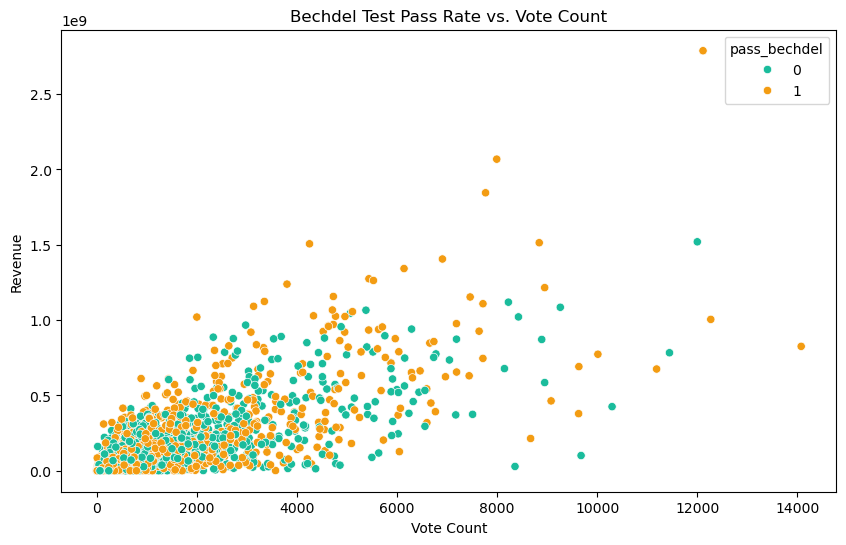

In [388]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='revenue', hue='pass_bechdel', data=df_merged,  palette= [ '#1abc9c',  
    '#f39c12'])
plt.title("Bechdel Test Pass Rate vs. Vote Count")
plt.xlabel("Vote Count")
plt.ylabel("Revenue")
plt.show()

### 1.9 Heatmap of Correlation Between Numerical Variables

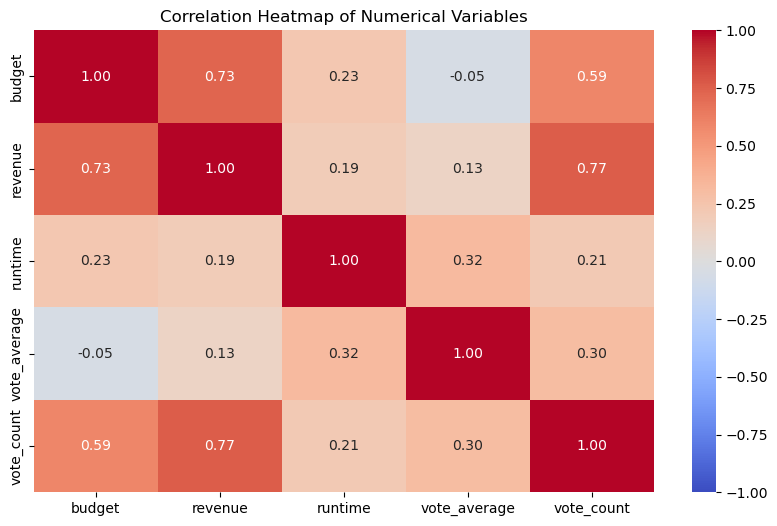

In [389]:
numerical_features = df_merged[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']]
correlation = numerical_features.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

### 2.1 Rating vs. Year with Bechdel Test Status

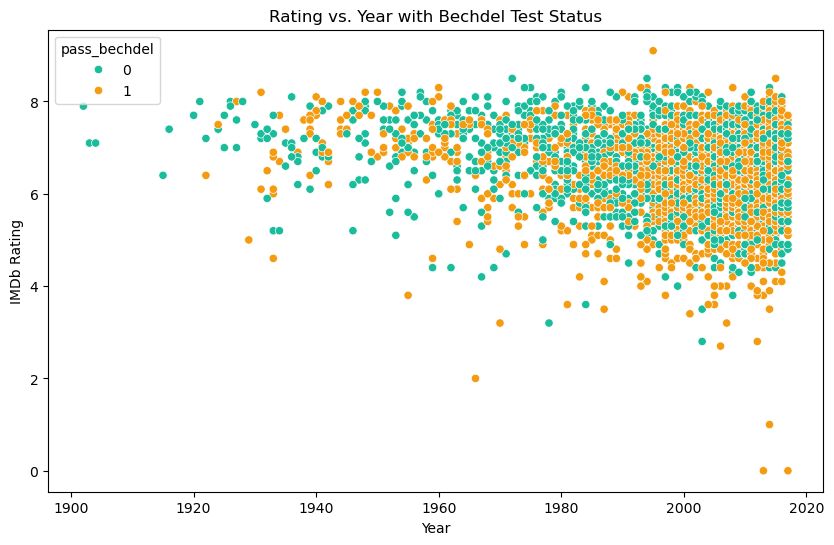

In [391]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='vote_average', hue='pass_bechdel', data=df_merged, palette= [ '#1abc9c',  
    '#f39c12'])
plt.title("Rating vs. Year with Bechdel Test Status")
plt.xlabel("Year")
plt.ylabel("IMDb Rating")
plt.show()

### 1.6 Pie Chart Spoken Language and 'Pass' Bechdel Score

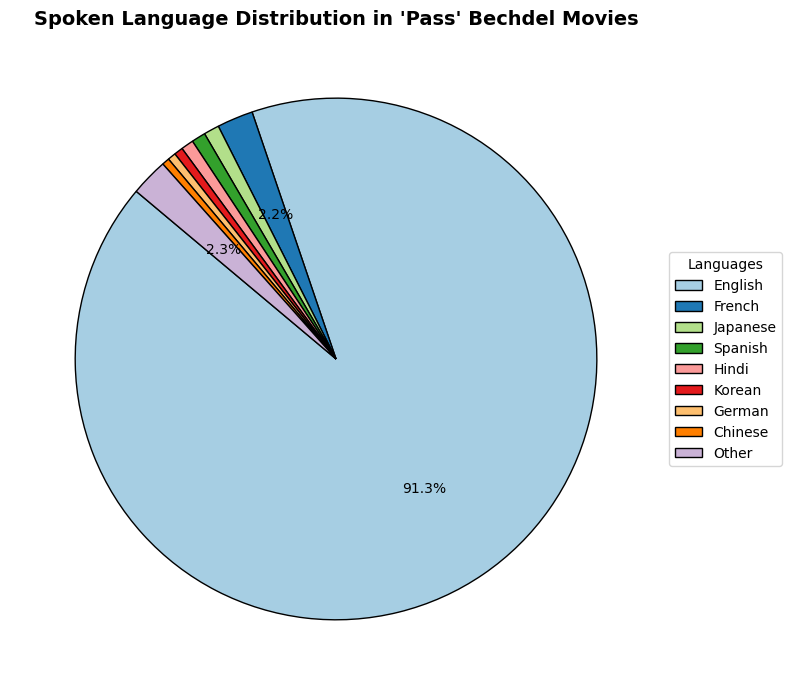

In [392]:
df_pass = df_merged[df_merged['pass_bechdel'] == 1]


language_counts = df_pass['original_language'].value_counts()


if len(language_counts) == 0:
    print("No data available for 'Pass' Bechdel movies.")
else:
    
    top_languages = language_counts.head(8)
    other_count = language_counts[8:].sum()  

    
    if other_count > 0:
        top_languages = pd.concat([top_languages, pd.Series({'Other': other_count})])

    
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        top_languages,
        labels=None, 
        autopct=lambda pct: f'{pct:.1f}%' if pct > 2 else '',  
        startangle=140,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'}
    )

   
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)
       

  
    plt.legend(
        wedges,
        top_languages.index,
        title="Languages",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

   
    plt.title("Spoken Language Distribution in 'Pass' Bechdel Movies", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [393]:
unique_countries = df_merged['production_countries'].explode().unique()

print(unique_countries)

['United States of America' 'Germany' 'United Kingdom' 'France' 'Italy'
 'Spain' 'Australia' 'Netherlands' 'Belgium' 'Hong Kong' 'Canada' 'Japan'
 'Austria' 'Switzerland' 'New Zealand' 'Mexico' 'Peru' 'Liechtenstein'
 'Denmark' 'Portugal' 'Ireland' 'Russia' 'Serbia' 'Hungary'
 'Czech Republic' 'Finland' 'India' 'Sweden' 'Brazil' '' 'China' 'Iran'
 'Iceland' 'Luxembourg' 'Ecuador' 'Bahamas' 'Malaysia' 'Argentina'
 'Norway' 'Taiwan' 'Pakistan' 'Thailand' 'Namibia' 'South Africa'
 'South Korea' 'Poland' 'Greece' 'Romania' 'Malta' 'Algeria' 'Morocco'
 'Uruguay' 'Paraguay' 'Qatar' 'Tunisia' 'Turkey' 'Israel' 'Slovenia'
 'Lithuania' 'Singapore' 'Angola' 'United Arab Emirates'
 'Serbia and Montenegro' 'Indonesia' 'Cyprus' 'Philippines' 'Chile'
 'Uganda' 'Ukraine' 'Cambodia' 'Puerto Rico']


In [394]:
country_name_mapping = {
    'United States of America': 'United States',
    'United Kingdom': 'UK',
    'South Korea': 'Korea, South',
    'Hong Kong': 'China',  
    'Soviet Union': 'Russia',  
    'Puerto Rico': 'United States',  
    'Palestinian Territory': 'Palestine',
    'Serbia and Montenegro': 'Serbia',  
    'Bahamas': 'The Bahamas',
    'Czech Republic': 'Czechia',  
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'French Polynesia': 'French Polynesia',
    'Netherlands Antilles': 'Netherlands',  
    'Soviet Union': 'Russia',  
    'Bulgaria': 'Bulgaria',
    'Malta': 'Malta',
    'Congo': 'Republic of the Congo',  
    'Indonesia': 'Indonesia',
    'South Africa': 'South Africa',
    'Venezuela': 'Venezuela',
    'Algeria': 'Algeria',
    'Iceland': 'Iceland',
    'Ecuador': 'Ecuador',
    'Slovakia': 'Slovakia',
    'Greece': 'Greece',
    'Lebanon': 'Lebanon',
    'Jordan': 'Jordan',
    'Tunisia': 'Tunisia',
    'Romania': 'Romania',
    'Turkey': 'Turkey',
    'Colombia': 'Colombia',
    'Georgia': 'Georgia',
    'Cuba': 'Cuba',
    'Panama': 'Panama',
    'Qatar': 'Qatar',
    'Uruguay': 'Uruguay',
    'Kazakhstan': 'Kazakhstan',
    'Cyprus': 'Cyprus',
    'Cambodia': 'Cambodia',
    'Luxembourg': 'Luxembourg',
    'Finland': 'Finland',
    'Norway': 'Norway',
    'Sweden': 'Sweden',
    'Brazil': 'Brazil',
    'Italy': 'Italy',
    'France': 'France',
    'Germany': 'Germany',
    'Spain': 'Spain',
    'Australia': 'Australia',
    'Canada': 'Canada',
    'Netherlands': 'Netherlands',
    'Belgium': 'Belgium',
    'Austria': 'Austria',
    'Switzerland': 'Switzerland',
    'Ireland': 'Ireland',
    'Taiwan': 'Taiwan',
    'New Zealand': 'New Zealand',
    'Mexico': 'Mexico',
    'Poland': 'Poland',
    'Peru': 'Peru',
    'Liechtenstein': 'Liechtenstein',
    'China': 'China',
    'Denmark': 'Denmark',
    'Portugal': 'Portugal',
    'Russia': 'Russia',
    'Serbia': 'Serbia',
    'Hungary': 'Hungary',
    'India': 'India',
    'Argentina': 'Argentina',
    'Croatia': 'Croatia',
    'Sweden': 'Sweden',
    'Finland': 'Finland',
    'Iran': 'Iran',
    'Iceland': 'Iceland',
    'Romania': 'Romania',
    'Malaysia': 'Malaysia',
    'South Africa': 'South Africa',
    'Pakistan': 'Pakistan',
    'Thailand': 'Thailand',
    'Namibia': 'Namibia',
    'Cameroon': 'Cameroon',
    'Philippines': 'Philippines',
    'Algeria': 'Algeria',
    'South Korea': 'Korea, South',
    'Israel': 'Israel',
    'Vietnam': 'Vietnam',
    'Malta': 'Malta',
    'Colombia': 'Colombia',
    'Chile': 'Chile',
    'Turkey': 'Turkey',
    'Morocco': 'Morocco',
    'Aruba': 'Aruba',
    'Georgia': 'Georgia',
    'Palestinian Territory': 'Palestine',
    'Uruguay': 'Uruguay',
    'Paraguay': 'Paraguay',
    'Qatar': 'Qatar',
    'Tunisia': 'Tunisia',
    'Mongolia': 'Mongolia',
    'Slovakia': 'Slovakia',
    'Lebanon': 'Lebanon',
    'Slovenia': 'Slovenia',
    'Lithuania': 'Lithuania',
    'Singapore': 'Singapore',
    'Ukraine': 'Ukraine',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Egypt': 'Egypt',
    'Bulgaria': 'Bulgaria',
    'Senegal': 'Senegal',
    'Angola': 'Angola',
    'United Arab Emirates': 'United Arab Emirates',
    'Costa Rica': 'Costa Rica',
    'Venezuela': 'Venezuela',
    'Serbia and Montenegro': 'Serbia',
    'Indonesia': 'Indonesia',
    'Congo': 'Congo',
    'Albania': 'Albania',
    'Bolivia': 'Bolivia',
    'Kazakhstan': 'Kazakhstan',
    'Cuba': 'Cuba',
    'Uganda': 'Uganda',
    'Saudi Arabia': 'Saudi Arabia',
    'Jordan': 'Jordan',
    'Cyprus': 'Cyprus',
    'Estonia': 'Estonia',
    'French Polynesia': 'French Polynesia',
    'Netherlands Antilles': 'Netherlands',
    'Panama': 'Panama',
    'Montenegro': 'Montenegro',
    'Cambodia': 'Cambodia',
}

df_merged['production_countries'] = df_merged['production_countries'].apply(
    lambda x: [country_name_mapping.get(country, country) for country in x]
)


Original Countries Before Replacement:
['United States' 'UK' 'France' 'Germany' 'Canada' 'Italy' 'Australia'
 'China' 'Japan' 'Spain' 'India' 'Ireland' 'Belgium' 'Sweden'
 'New Zealand' 'Denmark' 'Netherlands' 'Mexico' 'Czechia' 'Russia'
 'Hungary' 'Korea, South' 'Norway' '' 'South Africa' 'Finland'
 'Switzerland' 'Poland' 'Brazil' 'United Arab Emirates' 'Austria'
 'Romania' 'Taiwan' 'Iceland' 'Argentina' 'Portugal' 'Luxembourg' 'Iran'
 'Malta' 'Serbia' 'Qatar' 'Greece' 'Morocco' 'Tunisia' 'Chile' 'Peru'
 'Israel' 'Thailand' 'Turkey' 'Algeria' 'Uruguay' 'Indonesia' 'Singapore'
 'Philippines' 'Cyprus' 'Uganda' 'Ukraine' 'Angola' 'The Bahamas'
 'Lithuania' 'Slovenia' 'Paraguay' 'Namibia' 'Pakistan' 'Malaysia'
 'Ecuador' 'Liechtenstein' 'Cambodia']
         Country  Passing_Scores
0  United States            1827
1             UK             297
2         France             193
3        Germany             137
4         Canada             120


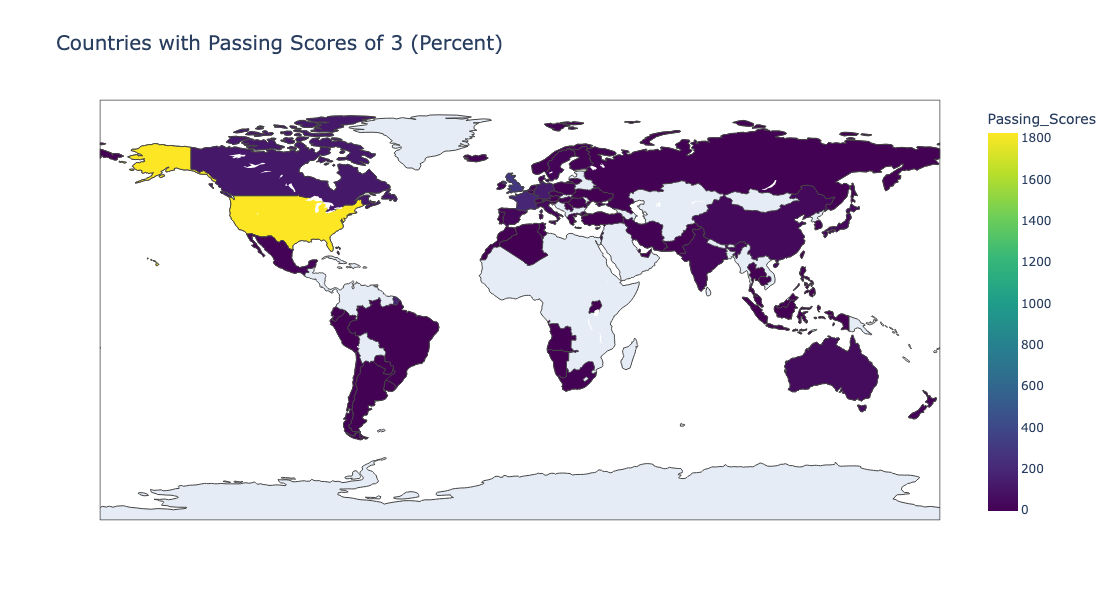

In [395]:
passing_data = df_merged[df_merged['rating'] == 3]
country_counts = passing_data['production_countries'].explode().value_counts().reset_index()
country_counts.columns = ['Country', 'Passing_Scores']


country_stats['Passing_Percentage'] = (country_stats['Passing_Scores'] / country_stats['Total_Movies']) * 100

print("Original Countries Before Replacement:")
print(country_stats['Country'].unique())
print(country_counts.head())

fig = px.choropleth(country_stats,
                    locations='Country',
                    locationmode='country names',
                    color='Passing_Scores',
                    hover_name='Country',
                    color_continuous_scale="Viridis",
                    title="Countries with Passing Scores of 3 (Percent)")


fig.update_layout(
    width=1000,  
    height=600,  
    title_font_size=20  
)


fig.show()


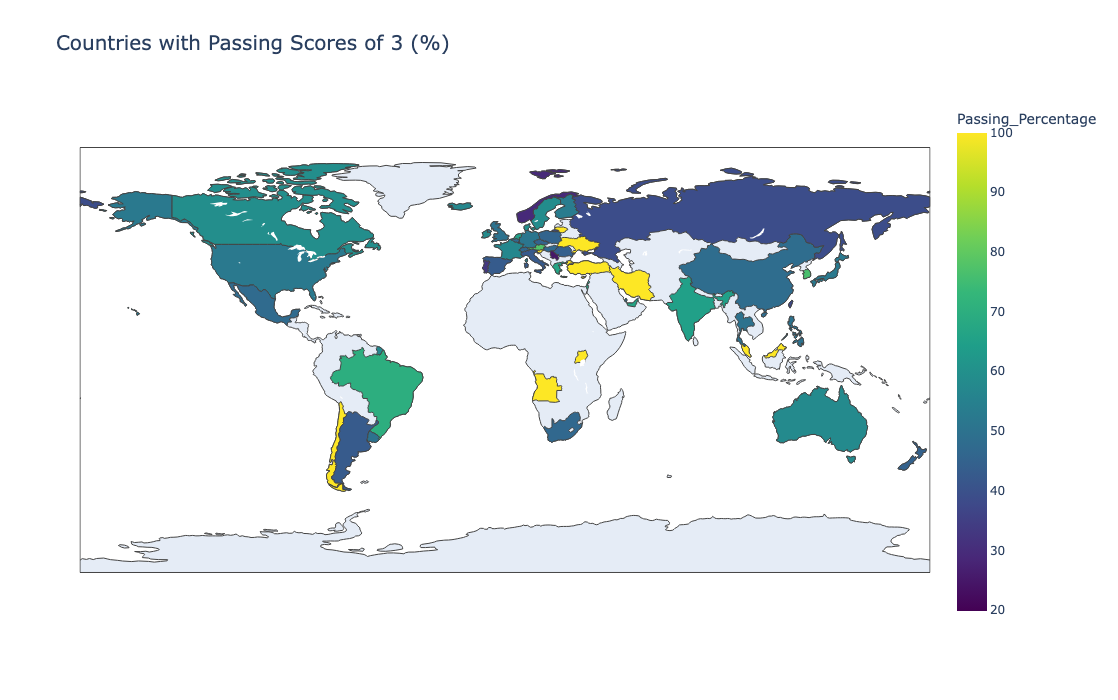

In [396]:
passing_data = df_merged[df_merged['rating'] == 3]

country_counts = passing_data['production_countries'].explode().value_counts().reset_index()
country_counts.columns = ['Country', 'Passing_Scores']

total_counts = df_merged['production_countries'].explode().value_counts().reset_index()
total_counts.columns = ['Country', 'Total_Movies']

country_stats = pd.merge(country_counts, total_counts, on='Country', how='left')


country_stats['Passing_Percentage'] = (country_stats['Passing_Scores'] / country_stats['Total_Movies']) * 100

world_geojson = px.data.gapminder().query('year == 2007')  

fig = px.choropleth(country_stats,
                    locations='Country',
                    locationmode='country names',
                    color='Passing_Percentage',
                    hover_name='Country',
                    color_continuous_scale="Viridis",
                    title="Countries with Passing Scores of 3 (%)")


fig.update_layout(
    width=1000,  
    height=700,  
    title_font_size=20  
)


fig.show()


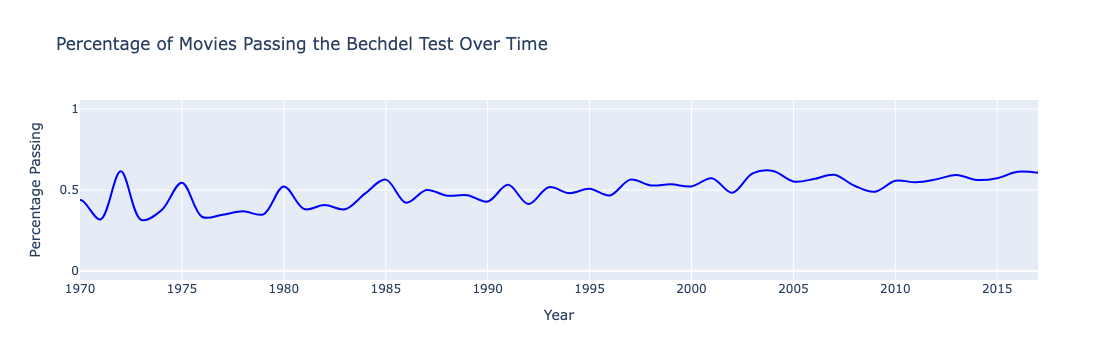

In [397]:
import plotly.express as px
df_merged['pass_bechdel'] = df_merged['rating'].apply(lambda x: 1 if x >= 3 else 0)
df_yearly = df_merged.groupby('year')['pass_bechdel'].mean().reset_index()


fig = px.line(
    df_yearly,
    x='year',
    y='pass_bechdel',
    title='Percentage of Movies Passing the Bechdel Test Over Time',
    labels={'pass_bechdel': 'Percentage Passing', 'year': 'Year'},
    line_shape='spline'
)


fig.update_traces(line=dict(color='blue', width=2))


fig.update_layout(
    xaxis=dict(range=[1889, df_yearly['year'].max()])  
)

fig.show()


## Scatter Plot: Box Office Revenue vs. IMDb Ratings, Color-Coded by Bechdel Compliance

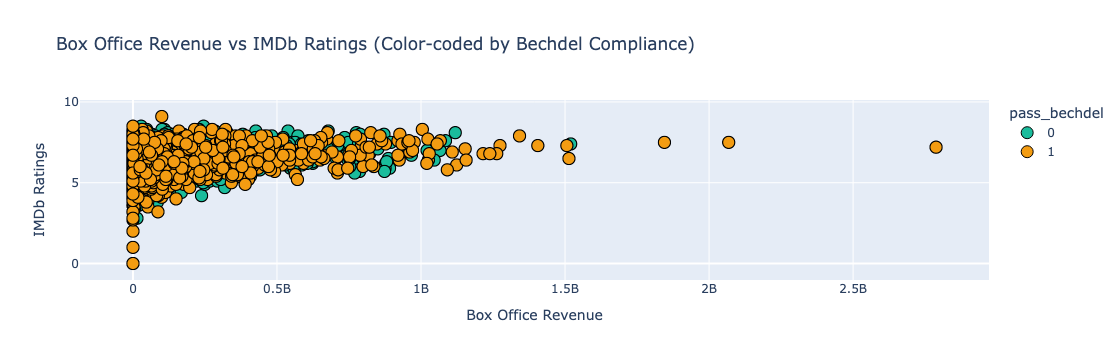

In [398]:
df_filtered = df_merged.dropna(subset=['revenue', 'vote_average'])


df_filtered['pass_bechdel'] = df_filtered['pass_bechdel'].astype('category')

fig = px.scatter(
    df_filtered,
    x='revenue',
    y='vote_average',
    color='pass_bechdel',
    title='Box Office Revenue vs IMDb Ratings (Color-coded by Bechdel Compliance)',
    labels={'revenue': 'Box Office Revenue', 'vote_average': 'IMDb Ratings'},
    color_discrete_sequence=['#1abc9c',   
    '#f39c12'],  
    hover_data=['original_title', 'year', 'genres']
)

fig.update_traces(marker=dict(size=12, line=dict(color='black', width=1)))  

fig.show()


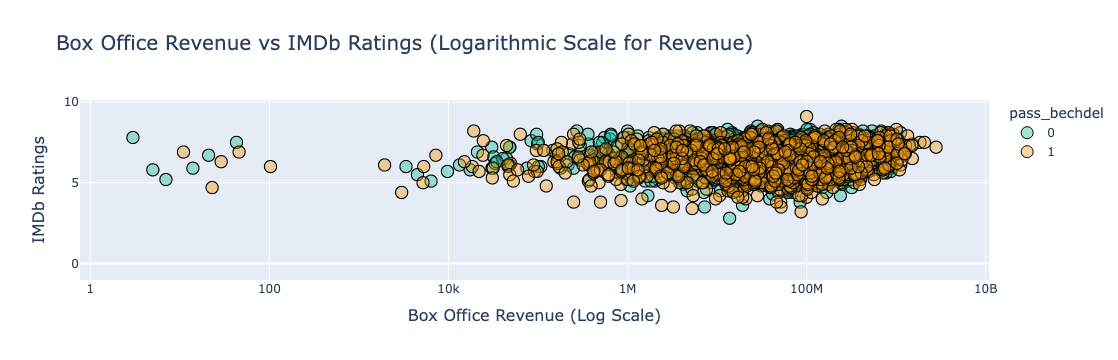

In [399]:
df_filtered = df_merged.dropna(subset=['revenue', 'vote_average'])

df_filtered['pass_bechdel'] = df_filtered['pass_bechdel'].astype('category')

fig = px.scatter(
    df_filtered,
    x='revenue',
    y='vote_average',
    color='pass_bechdel',
    title='Box Office Revenue vs IMDb Ratings (Logarithmic Scale for Revenue)',
    labels={'revenue': 'Box Office Revenue', 'vote_average': 'IMDb Ratings'},
    color_discrete_sequence=['rgba(26, 188, 156, 0.4)',  
                            'rgba(243, 156, 18, 0.4)'], 
    hover_data=['original_title', 'year', 'genres']
)

fig.update_layout(
    xaxis=dict(
        type='log',  
        title='Box Office Revenue (Log Scale)',
        title_font=dict(size=16),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='IMDb Ratings',
        title_font=dict(size=16),
        tickfont=dict(size=12)
    ),
    title=dict(
        text='Box Office Revenue vs IMDb Ratings (Logarithmic Scale for Revenue)',
        font=dict(size=20)
    )
)


fig.update_traces(marker=dict(size=12, line=dict(color='black', width=1)))  


fig.show()



## Choropleth Map: Bechdel Test Compliance Rates by Country

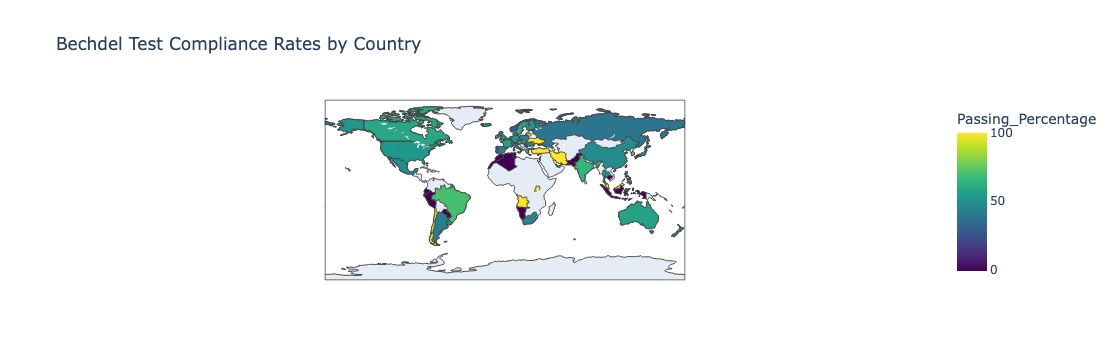

In [400]:
country_compliance = df_merged['production_countries'].explode().value_counts().reset_index()
country_compliance.columns = ['Country', 'Total_Movies']

country_passed = df_merged[df_merged['pass_bechdel'] == 1]['production_countries'].explode().value_counts().reset_index()
country_passed.columns = ['Country', 'Passing_Scores']

country_stats = pd.merge(country_compliance, country_passed, on='Country', how='left').fillna(0)
country_stats['Passing_Percentage'] = (country_stats['Passing_Scores'] / country_stats['Total_Movies']) * 100

fig = px.choropleth(country_stats,
                    locations='Country',
                    locationmode='country names',
                    color='Passing_Percentage',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title='Bechdel Test Compliance Rates by Country'
)
fig.show()


In [401]:

df_merged['popularity'] = pd.to_numeric(df_merged['popularity'], errors='coerce')

df_merged = df_merged.dropna(subset=['popularity'])


## Box Plot: IMDb Ratings by Genre, Split by Bechdel Compliance

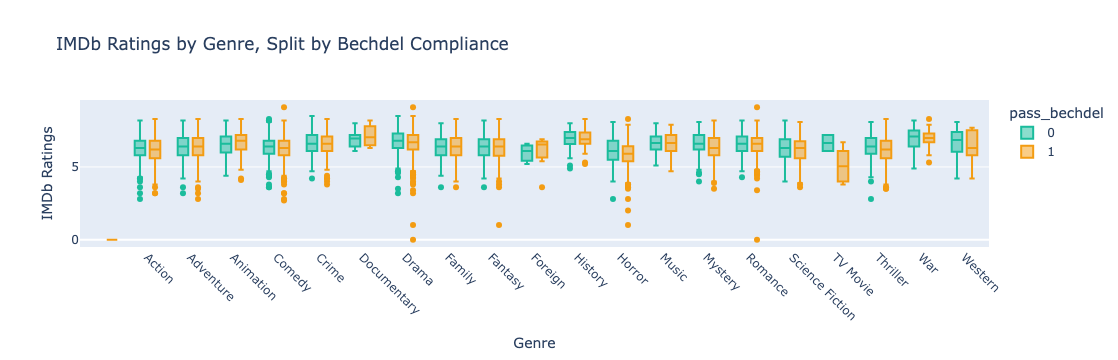

In [402]:
df_genres = df_merged.explode('genres')

fig = px.box(
    df_genres,
    x='genres',
    y='vote_average',
    color='pass_bechdel',
    title='IMDb Ratings by Genre, Split by Bechdel Compliance',
    labels={'vote_average': 'IMDb Ratings', 'genres': 'Genre'},
    color_discrete_sequence=['#1abc9c',   
    '#f39c12'], 
    category_orders={'genres': sorted(df_genres['genres'].unique())}
)
fig.update_layout(xaxis_tickangle=45)
fig.show()


## Stacked Area Chart: Bechdel Test Passing Movies by Genre Over Time

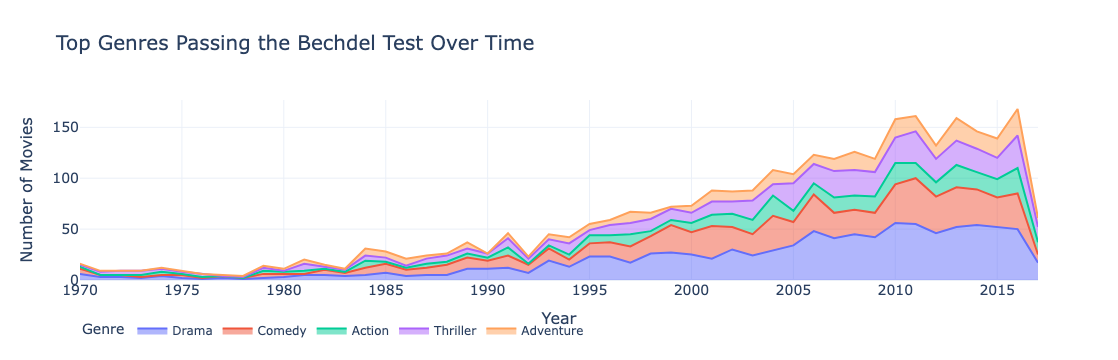

In [403]:
df_merged['pass_bechdel'] = df_merged['rating'].apply(lambda x: 1 if x >= 3 else 0)

df_genre_time = df_merged.explode('genres')

top_genres = (
    df_genre_time['genres']
    .value_counts()
    .nlargest(5) 
    .index.tolist()
)


df_genre_time_filtered = df_genre_time[df_genre_time['genres'].isin(top_genres)]


df_genre_time_grouped = (
    df_genre_time_filtered.groupby(['year', 'genres', 'pass_bechdel'])
    .size()
    .reset_index(name='count')
)


df_genre_pass = df_genre_time_grouped[df_genre_time_grouped['pass_bechdel'] == 1]


fig = px.area(
    df_genre_pass,
    x='year',
    y='count',
    color='genres',
    title='Top Genres Passing the Bechdel Test Over Time',
    labels={
        'count': 'Number of Movies',
        'year': 'Year',
        'genres': 'Genre'
    },
    template='plotly_white'
)


fig.update_layout(
    title=dict(
        text='Top Genres Passing the Bechdel Test Over Time',
        font=dict(size=20)
    ),
    xaxis=dict(
        title='Year',
        title_font=dict(size=16),
        range=[1889, df_genre_time['year'].max()],
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title='Number of Movies',
        title_font=dict(size=16),
        tickfont=dict(size=14)
    ),
    legend=dict(
        title='Genre',
        font=dict(size=12),
        orientation="h",
        y=-0.2  
    )
)
fig.update_layout(
    xaxis=dict(range=[1920, df_yearly['year'].max()])  
)

fig.show()


## Sentiment Word Cloud for Passing vs. Failing Movies

In [404]:
!pip install wordcloud


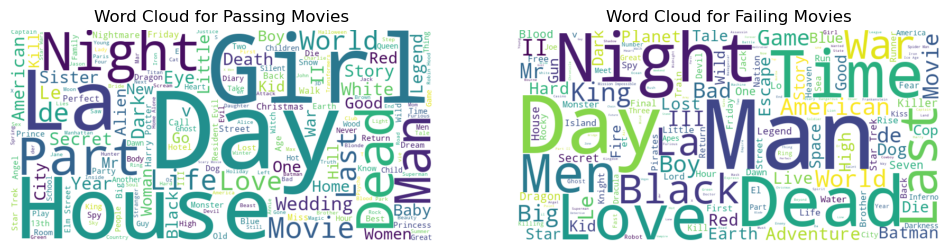

In [405]:
from wordcloud import WordCloud

passing_movies = df_merged[df_merged['pass_bechdel'] == 1]['original_title']
failing_movies = df_merged[df_merged['pass_bechdel'] == 0]['original_title']


passing_text = " ".join(passing_movies)
failing_text = " ".join(failing_movies)

passing_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(passing_text)
failing_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(failing_text)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(passing_wordcloud, interpolation="bilinear")
plt.title("Word Cloud for Passing Movies")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(failing_wordcloud, interpolation="bilinear")
plt.title("Word Cloud for Failing Movies")
plt.axis("off")

plt.show()


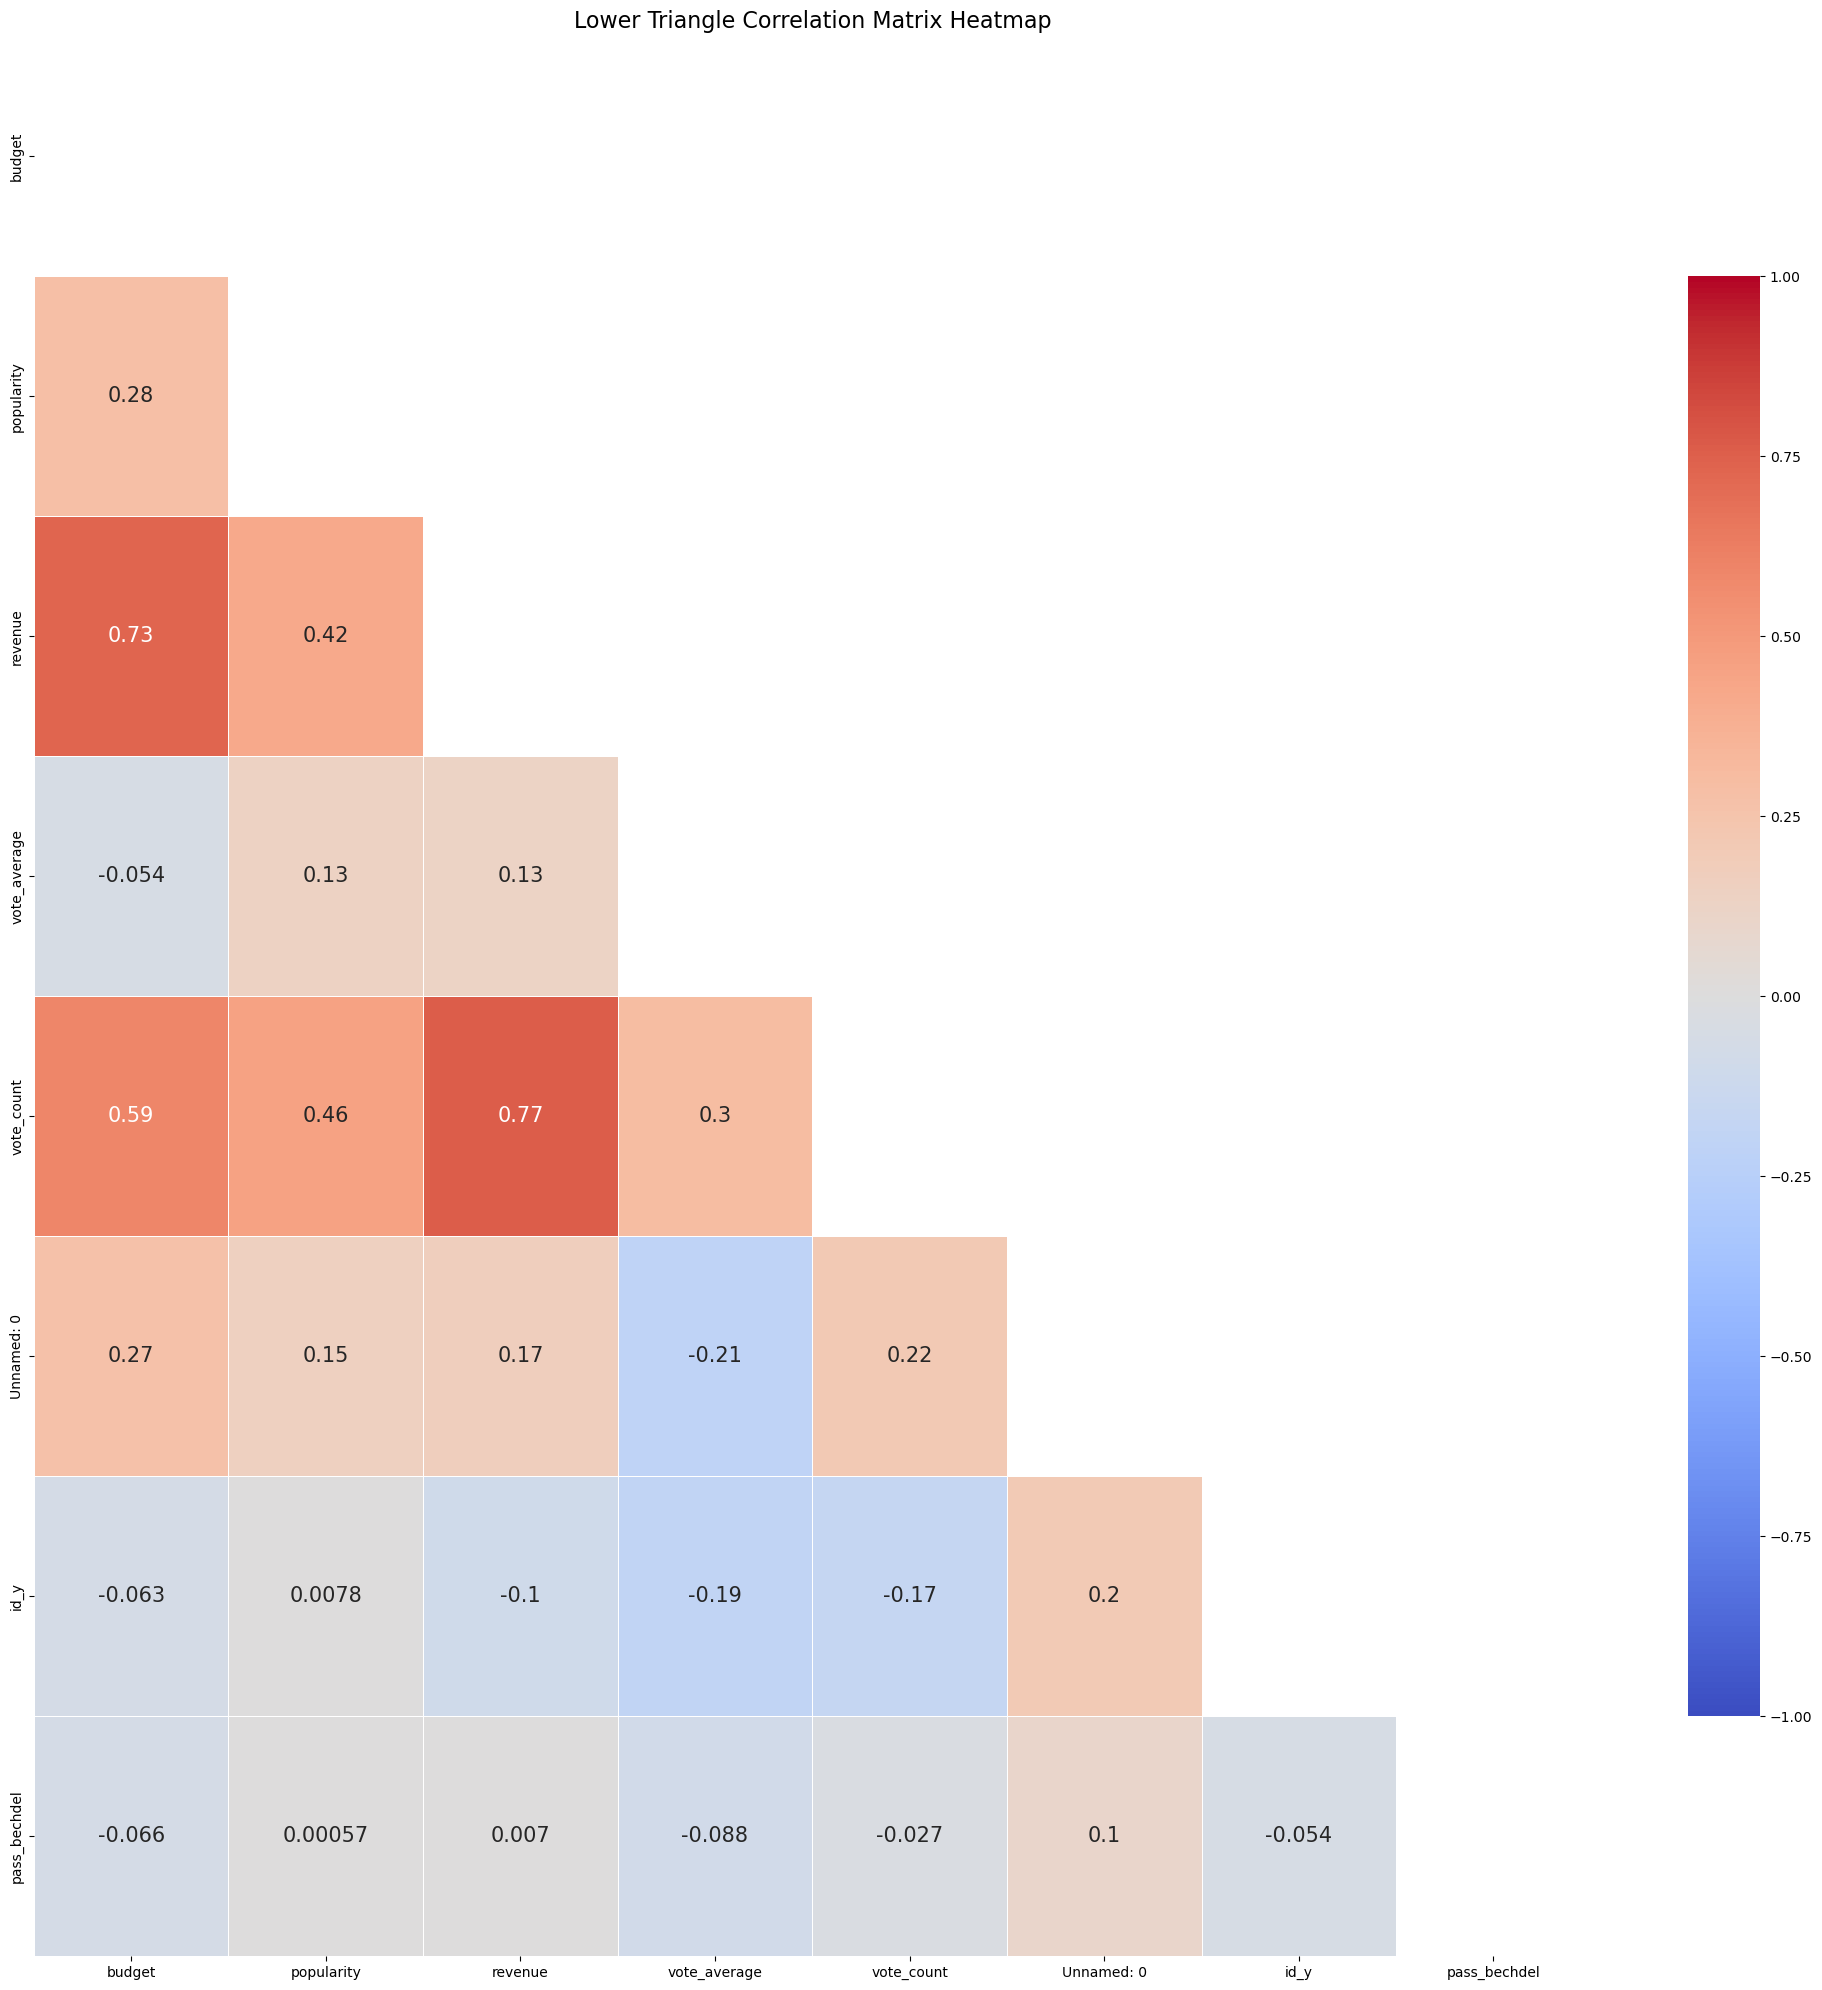

In [406]:
columns_to_exclude = ['adult',  'genres', 'original_language', 'production_companies','production_countries','status', 'title_y', 'original_title']

df_filtered = df_merged.drop(columns=columns_to_exclude)

df_numeric = df_filtered.select_dtypes(include=[np.number])


correlation_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(20, 20))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2', vmin=-1, vmax=1,
            mask=mask, linewidths=0.5, annot_kws={"size": 15}, cbar_kws={"shrink": 0.75})


plt.title("Lower Triangle Correlation Matrix Heatmap", fontsize=16)


plt.tight_layout()

plt.show()
plt.show()

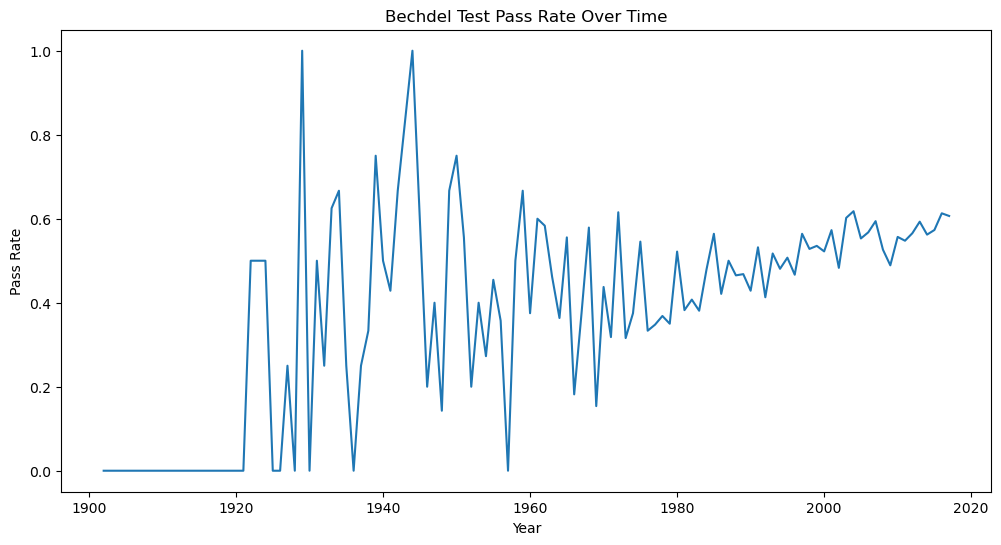

In [410]:
pass_rate = df_merged.groupby('year')['pass_bechdel'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=pass_rate.index, y=pass_rate.values)
plt.title('Bechdel Test Pass Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Pass Rate')
plt.show()


# Machine Learning

## Comparing Random Forest and Logistic Regression and XGBoost

In [407]:
df_merged['pass_bechdel'].value_counts()

pass_bechdel
1    2191
0    1970
Name: count, dtype: int64

In [408]:
y.value_counts(normalize=True)


pass_bechdel
1.0    0.501268
0.0    0.498732
Name: proportion, dtype: float64

In [409]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, roc_auc_score, mean_squared_error
from sklearn.decomposition import PCA


from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')


In [436]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df_merged[['budget', 'revenue', 'vote_average', 'vote_count', 'popularity', 'year']]
y = df_merged['pass_bechdel'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}


for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    print(f'{model_name} Evaluation:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('\n' + '-'*50)


Logistic Regression Evaluation:
Accuracy: 0.5414165666266506
Confusion Matrix:
 [[ 97 324]
 [ 58 354]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.23      0.34       421
           1       0.52      0.86      0.65       412

    accuracy                           0.54       833
   macro avg       0.57      0.54      0.49       833
weighted avg       0.57      0.54      0.49       833


--------------------------------------------------
Random Forest Evaluation:
Accuracy: 0.5798319327731093
Confusion Matrix:
 [[221 200]
 [150 262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.52      0.56       421
           1       0.57      0.64      0.60       412

    accuracy                           0.58       833
   macro avg       0.58      0.58      0.58       833
weighted avg       0.58      0.58      0.58       833


---------------------------------------------

## After applying cross validatioin and hyperparameter tuning:

In [443]:
X = df_merged[['budget', 'revenue', 'vote_average', 'vote_count', 'popularity', 'year']]
y = df_merged['pass_bechdel'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Train and evaluate each model with cross-validation
for model_name, model in models.items():
    # Train the model with cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    
    # Output the average cross-validation score
    print(f'{model_name} - Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
    
    # Train the model on the entire training set
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    print(f'{model_name} Evaluation on Test Data:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('\n' + '-'*50)


Logistic Regression - Cross-Validation Accuracy: 0.5637
Logistic Regression Evaluation on Test Data:
Accuracy: 0.5414165666266506
Confusion Matrix:
 [[ 97 324]
 [ 58 354]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.23      0.34       421
           1       0.52      0.86      0.65       412

    accuracy                           0.54       833
   macro avg       0.57      0.54      0.49       833
weighted avg       0.57      0.54      0.49       833


--------------------------------------------------
Random Forest - Cross-Validation Accuracy: 0.5727
Random Forest Evaluation on Test Data:
Accuracy: 0.5654261704681873
Confusion Matrix:
 [[220 201]
 [161 251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.52      0.55       421
           1       0.56      0.61      0.58       412

    accuracy                           0.57       833
   macro avg       0.57

In [444]:
# GridSearchCV for Random Forest 
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_


Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [445]:
param_grid_xgb = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_


Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [446]:
# For Random Forest
rf_feature_importance = best_rf_model.feature_importances_
print('Feature Importance for Random Forest:', rf_feature_importance)

# For XGBoost
xgb_feature_importance = best_xgb_model.feature_importances_
print('Feature Importance for XGBoost:', xgb_feature_importance)


Feature Importance for Random Forest: [0.18259435 0.16225099 0.1398328  0.18469043 0.16716443 0.163467  ]
Feature Importance for XGBoost: [0.19387145 0.17448866 0.16569029 0.17277744 0.1209092  0.17226297]


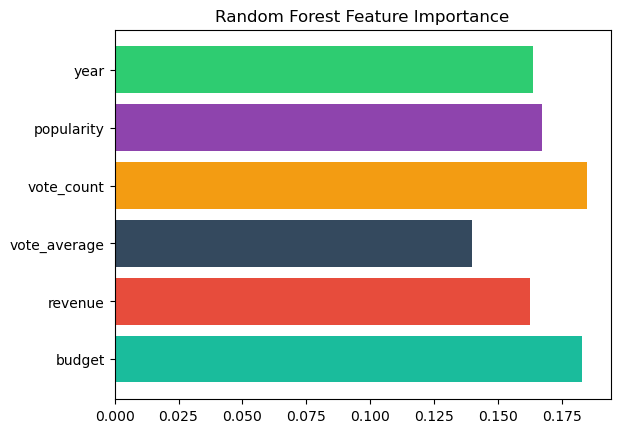

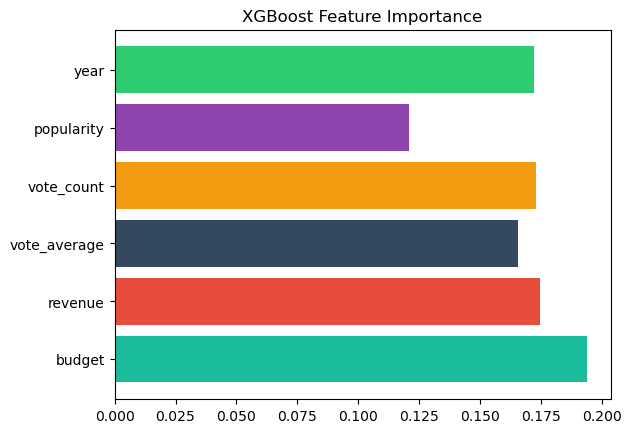

In [447]:
feature_names = X.columns


colors = ['#1abc9c', '#e74c3c', '#34495e', '#f39c12', '#8e44ad','#2ecc71']

# For Random Forest Plot
plt.barh(feature_names, rf_feature_importance, color=colors * (len(feature_names) // len(colors)) + colors[:len(feature_names) % len(colors)])
plt.title('Random Forest Feature Importance')
plt.show()

# For XGBoost Plot
plt.barh(feature_names, xgb_feature_importance, color=colors * (len(feature_names) // len(colors)) + colors[:len(feature_names) % len(colors)])
plt.title('XGBoost Feature Importance')
plt.show()
